<a href="https://www.kaggle.com/code/lucasbruzzone/estudo-do-dataset-unsw-nb15?scriptVersionId=138008763" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Estudo do dataset UNSW-NB15

Neste estudo, vamos analisar o conjunto de dados UNSW-NB15 para detecção de intrusões, seguindo o cenário proposto no artigo intitulado "Statistical analysis of the UNSW-NB15 dataset for intrusion detection" de Kumar, Vikash, Das, Ayan Kumar, e Sinha, Ditipriya.

O artigo foi publicado nos procedimentos da Conferência de Inteligência Computacional em Reconhecimento de Padrões (CIPR) em 2019 pela editora Springer.


## Objetivo

O objetivo deste estudo é realizar uma análise estatística detalhada do conjunto de dados UNSW-NB15 e aplicar técnicas de detecção de intrusões para identificar atividades maliciosas em redes de computadores.

## Abordagem Inicial

Inicialmente, vamos seguir a abordagem proposta no artigo para explorar o conjunto de dados, identificar padrões e realizar análises estatísticas relevantes. Essa análise nos permitirá entender a natureza dos dados e, posteriormente, aplicar algoritmos de detecção de intrusões para classificar eventos de rede como benignos ou maliciosos.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore") 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/moa3-datastream/moa-train.csv
/kaggle/input/moa3-datastream/moa-instances.csv
/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv
/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv


In [2]:
# Load Data
filepath = '/kaggle/input/unsw-nb15/'

train = pd.read_csv(os.path.join(filepath, 'UNSW_NB15_training-set.csv'),index_col = 0)
test = pd.read_csv(os.path.join(filepath, 'UNSW_NB15_testing-set.csv'),index_col = 0)

train.drop('label', axis=1, inplace=True)
test.drop('label', axis=1, inplace=True)

# Análise Exploratória de Dados (EDA)

Antes de prosseguirmos com a análise do conjunto de dados, é importante realizar uma etapa crucial conhecida como Análise Exploratória de Dados (EDA). Nessa etapa, vamos explorar e compreender a estrutura dos dados disponíveis, identificando as principais características e informações relevantes para o nosso estudo.

## Identificação das Features Numéricas e Categóricas

Vamos começar identificando quais features do conjunto de dados são numéricas e quais são categóricas. As features numéricas são aquelas que representam valores quantitativos, enquanto as categóricas representam categorias ou grupos. Essa distinção é fundamental para selecionarmos as abordagens adequadas para cada tipo de dado.

In [3]:
# Define columns
num_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = train.select_dtypes(include=['object']).columns.tolist()
print("Colunas Numéricas")
print(num_cols)
print("Colunas Categóricas")
print(cat_cols)

Colunas Numéricas
['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']
Colunas Categóricas
['proto', 'service', 'state', 'attack_cat']


## Identificação dos Valores das Features Categóricas

Nesta etapa, vamos explorar as features categóricas do conjunto de dados para identificar os valores únicos presentes em cada uma delas. Essa informação é importante para entendermos a diversidade de categorias e a distribuição dos dados nessas features.


In [4]:
uniques = {}

for column in train.columns:
    uniques[column] = train[column].unique().tolist()
    if column  in cat_cols:
        print(uniques[column])

print(f"train shape :{train.shape}")

['udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp', 'ip', 'ipnip', 'st2', 'argus', 'chaos', 'egp', 'emcon', 'nvp', 'pup', 'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2', 'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'netblt', 'mfe-nsp', 'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6', 'sdrp', 'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd', 'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any', 'ipv6-opts', 'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn', 'pvp', 'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'vines', 'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp', 'ax.25', 'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp', 'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp', 'bna', 'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep', 'secure-vmtp', 'xtp', 'il', 'rsvp', 'unas', 'fc', 'iso-ip', 'etherip', 'pim', 'aris', 'a/n', 'ipcomp', 'snp', 'compaq-peer', 'ipx-n-ip', 'pgm', 'vrrp', 'l2tp

Aqui podemos observar que existem 10 classes de ataque, sendo uma 'Normal' e as outras 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits', 'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'.  

Um ponto importante que foi identificado foi a quantidade de features presentes nesse conjunto de dados. O artigo no qual estamos comparando esse estudo contabilizou 47 features enquanto na nossa análise, identificamos 43 features. 

As seguintes features estão ausentes:

1. Srcip (Source IP address)
2. Sport (Source port address)
3. Dstip (Destination IP address)
4. Dsport (Destination port address)

Inicialmente não podemos afirmar que a falta dessas features vai prejudicar a análise.

## Encoding de Classes Categóricas

Para facilitar a análise, é comum realizar o encoding de todas as classes categóricas presentes no conjunto de dados. O encoding é um processo que transforma os valores categóricos em valores numéricos, permitindo que algoritmos de machine learning possam trabalhar com esses dados.

No nosso estudo do dataset UNSW-NB15, iremos aplicar o encoding de todas as classes categóricas para garantir que todas as features estejam representadas de forma numérica e prontas para a análise e modelagem.

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Lista para armazenar o mapeamento das classes para cada coluna categórica, exceto 'attack'
label_encoder_mappings = {}

for col in cat_cols:
        train[col] = le.fit_transform(train[col])
        test[col] = le.fit_transform(test[col])  # Use transform em vez de fit_transform no conjunto de teste
        
        # Armazenar o mapeamento das classes no dicionário
        label_encoder_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

Nesta etapa, realizamos uma análise exploratória dos conjuntos de dados de treinamento e teste (Train data e Test data). Para isso, utilizamos a função `check_data`, que nos fornece informações importantes sobre os dados, incluindo as primeiras 5 linhas, as estatísticas resumidas (média, desvio padrão, mínimo, máximo, quartis, etc.), a contagem de valores únicos em cada coluna, a presença de valores faltantes (NaN) e valores nulos (Null) em cada coluna.

In [6]:
def set_frame_style(df, caption=""):
    """Helper function to set dataframe presentation style.
    """
    return df.style.background_gradient(cmap='Blues').set_caption(caption).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'Blue'),
        ('font-size', '18px'),
        ('font-weight','bold')
    ]}])

def check_data(data, title):
    cols = data.columns.to_list()
    display(set_frame_style(data[cols].head(),f'{title}: First 5 Rows Of Data'))
    display(set_frame_style(data[cols].describe(),f'{title}: Summary Statistics'))
    display(set_frame_style(data[cols].nunique().to_frame().rename({0:'Unique Value Count'}, axis=1).transpose(), f'{title}: Unique Value Counts In Each Column'))
    display(set_frame_style(data[cols].isna().sum().to_frame().transpose(), f'{title}:Columns With Nan'))
    display(set_frame_style(data[cols].isnull().sum().to_frame().transpose(), f'{title}:Columns With Null'))
    
    
check_data(train, 'Train data')
print('-'*100)
check_data(test, 'Test data')
print('-'*100)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000011,117,0,4,2,0,496,0,90909.090200,254,0,180363632.000000,0.000000,0,0,0.011000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,6
2,0.000008,117,0,4,2,0,1762,0,125000.000300,254,0,881000000.000000,0.000000,0,0,0.008000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,6
3,0.000005,117,0,4,2,0,1068,0,200000.005100,254,0,854400000.000000,0.000000,0,0,0.005000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,6
4,0.000006,117,0,4,2,0,900,0,166666.660800,254,0,600000000.000000,0.000000,0,0,0.006000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,6
5,0.000010,117,0,4,2,0,2126,0,100000.002500,254,0,850400000.000000,0.000000,0,0,0.010000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,6


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
count,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,109.348273,1.421695,3.374751,18.666472,17.545936,7993.908165,13233.785563,82410.886739,180.967667,95.713003,64549016.914059,630546.959000,4.753692,6.308556,755.394301,121.701284,6363.075100,535.180430,133.459080,1084641551.115289,1073464670.880387,128.286620,0.055925,0.029256,0.026669,139.528604,116.275069,0.094277,1595.371885,9.546604,1.369273,5.744923,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,4.987757
std,4.710444,18.637282,2.108083,0.670372,133.916353,115.574086,171642.261880,151471.456091,148620.367041,101.513358,116.667722,179861832.630003,2393000.555646,64.649620,55.708021,6182.615732,1292.378499,56724.016689,3635.305383,127.357000,1390859761.610447,1381996192.032797,127.491370,0.116022,0.070854,0.055094,208.472063,244.600271,0.542922,38066.972292,11.090289,1.067188,8.418112,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,1.431541
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,111.000000,0.000000,3.000000,2.000000,0.000000,114.000000,0.000000,28.606114,62.000000,0.000000,11202.466797,0.000000,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,4.000000
50%,0.014138,111.000000,0.000000,3.000000,6.000000,2.000000,534.000000,178.000000,2650.176667,254.000000,29.000000,577003.218750,2112.951416,1.000000,0.000000,0.557929,0.010000,17.623918,0.000000,255.000000,27888855.000000,28569748.500000,255.000000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,5.000000
75%,0.719360,117.000000,2.000000,4.000000,12.000000,10.000000,1280.000000,956.000000,111111.107200,254.000000,252.000000,65142856.000000,15858.082275,3.000000,2.000000,63.409444,63.136369,3219.332412,128.459914,255.000000,2171309606.500000,2144205173.000000,255.000000,0.105541,0.052596,0.048816,100.000000,87.000000,0.000000,0.000000,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,6.000000
max,59.999989,130.000000,12.000000,6.000000,10646.000000,11018.000000,14355774.000000,14657531.000000,1000000.003000,255.000000,253.000000,5268000256.000000,20821108.000000,5319.000000,5507.000000,60009.992000,57739.240000,1483830.917000,463199.240100,255.000000,4294949667.000000,4294880717.000000,255.000000,3.821465,3.226788,2.928778,1504.000000,1500.000000,131.000000,5242880.000000,63.000000,6.000000,59.000000,59.000000,38.000000,63.00000

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
Unique Value Count,39888,131,13,7,420,436,4489,4034,40616,11,8,42873,40614,253,311,39970,37617,39944,38381,11,39219,39108,14,26130,24934,24020,1282,1222,8,1190,57,7,50,50,33,57,3,3,8,50,57,2,10


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


----------------------------------------------------------------------------------------------------


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.121478,113,0,2,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,6
2,0.649902,113,0,2,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,6
3,1.623129,113,0,2,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,6
4,1.681642,113,3,2,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,6
5,0.449454,113,0,2,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,6


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
count,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,109.606675,1.618920,2.355176,20.298664,18.969591,8844.843836,14928.918564,95406.187105,179.546997,79.609567,73454033.194063,671205.574188,4.953000,6.948010,985.976864,88.216296,4976.254226,604.353826,116.257339,969250421.910511,968877027.071153,115.013625,0.041396,0.021020,0.020375,136.751769,124.173382,0.105982,2144.291655,9.306437,1.304179,6.193936,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,4.670100
std,6.480249,22.352601,2.305151,0.867942,136.887597,110.258271,174765.644309,143654.217718,165400.978457,102.940011,110.506863,188357447.000203,2421312.388757,66.005059,52.732999,7242.245841,987.093195,44965.846519,4061.043281,127.001024,1355264249.263036,1353999546.225652,126.886530,0.079354,0.043400,0.040506,204.677360,258.317056,0.776911,54207.967294,10.704331,0.954406,8.052476,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,1.568238
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,113.000000,0.000000,2.000000,2.000000,0.000000,114.000000,0.000000,32.786140,62.000000,0.000000,13053.338870,0.000000,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,3.000000
50%,0.001582,113.000000,0.000000,2.000000,2.000000,2.000000,430.000000,164.000000,3225.806520,254.000000,29.000000,879674.750000,1447.022705,0.000000,0.000000,0.279733,0.006000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,5.000000
75%,0.668069,119.000000,2.000000,3.000000,12.000000,10.000000,1418.000000,1102.000000,125000.000300,254.000000,252.000000,88888888.000000,27844.871090,3.000000,2.000000,55.156896,51.053000,2513.295019,114.990625,255.000000,1916651334.000000,1913674673.000000,255.000000,0.065481,0.023268,0.038906,100.000000,89.000000,0.000000,0.000000,12.000000,2.000000,7.000000,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,6.000000
max,59.999989,132.000000,12.000000,8.000000,9616.000000,10974.000000,12965233.000000,14655550.000000,1000000.003000,255.000000,254.000000,5988000256.000000,22422730.000000,4803.000000,5484.000000,84371.496000,56716.824000,1460480.016000,289388.269700,255.000000,4294958913.000000,4294881924.000000,255.000000,2.518893,2.100352,1.520884,1504.000000,1458.000000,172.000000,6558056.000000,63.000000,6.000000,51.000000,51.0000

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
Unique Value Count,74039,133,13,9,480,443,7214,6660,76991,11,6,80885,77474,409,370,76161,74245,77532,76831,13,75265,75089,7,43319,40142,37708,1357,1328,11,2386,52,5,50,47,32,54,4,4,11,50,52,2,10


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


----------------------------------------------------------------------------------------------------


Podemos observar que o conjunto de dados não possui nenhum dado Null ou NaN. Também identificamos a presença de 82332 linhas no conjunto de treinamento e 175341 no conjunto de testes.

# Análise Gráfica

Nesta etapa, vamos realizar algumas análises gráficas para obter uma melhor percepção do comportamento dos dados e da relação entre as features e o target.

Essas análises gráficas nos ajudarão a entender melhor os dados e a tomar decisões mais informadas sobre o pré-processamento e a seleção de features para o desenvolvimento dos modelos de machine learning.

## Análise de Correlação

Nesta etapa, realizamos uma análise de correlação entre as features do conjunto de treinamento e a variável alvo 'attack_cat'. Primeiramente, calculamos a matriz de correlação para as features numéricas utilizando o método `.corr()` do DataFrame. Em seguida, extraímos a correlação entre cada feature e o target, descartando a correlação da variável alvo consigo mesma.

Através da visualização de um heatmap, usando a biblioteca `seaborn`, plotamos as correlações selecionadas com valores absolutos maiores ou iguais a 0.05. Isso nos permite identificar as features com maior impacto na variável alvo. As cores mais quentes (vermelho) indicam maior correlação positiva, enquanto as cores mais frias (azul) indicam maior correlação negativa.

As análises de correlação nos auxiliam a entender melhor a relação entre as variáveis e o target, proporcionando uma base sólida para a seleção e preparação adequada das features que serão utilizadas na construção dos modelos de detecção de intrusões.


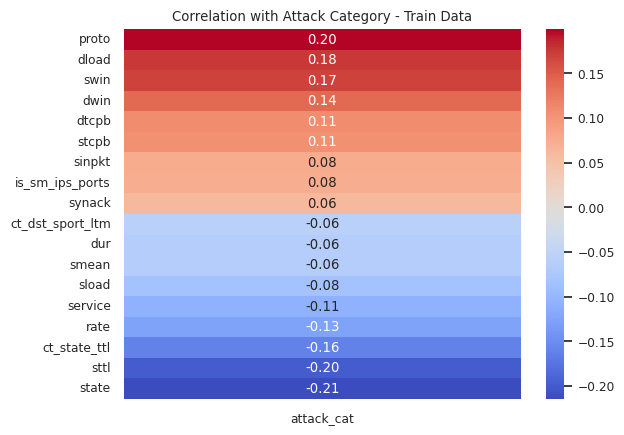

Quantidade: 24
['tcprtt', 'dmean', 'ct_dst_ltm', 'ackdat', 'dinpkt', 'ct_dst_src_ltm', 'ct_flw_http_mthd', 'sjit', 'ct_srv_src', 'ct_srv_dst', 'dpkts', 'response_body_len', 'dloss', 'dbytes', 'djit', 'ct_src_dport_ltm', 'ct_src_ltm', 'ct_ftp_cmd', 'spkts', 'is_ftp_login', 'trans_depth', 'sloss', 'dttl', 'sbytes']


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


corr = train.corr(numeric_only=True)
target_corr = corr['attack_cat'].drop('attack_cat')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Selecionar as features com valores de correlação maiores que 0.05 em módulo
target_corr_filtered = target_corr_sorted[abs(target_corr_sorted) >= 0.05]

# Criar uma lista com os nomes das features com valores menores que 0.05 em módulo
low_corr_features = target_corr_sorted[abs(target_corr_sorted) < 0.05].index.tolist()


# Plotar o heatmap com as features selecionadas
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_filtered.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Attack Category - Train Data')
plt.show()

# Printar o nome das features com valores menores que 0.1
print(f"Quantidade: {len(low_corr_features)}")
print(low_corr_features)

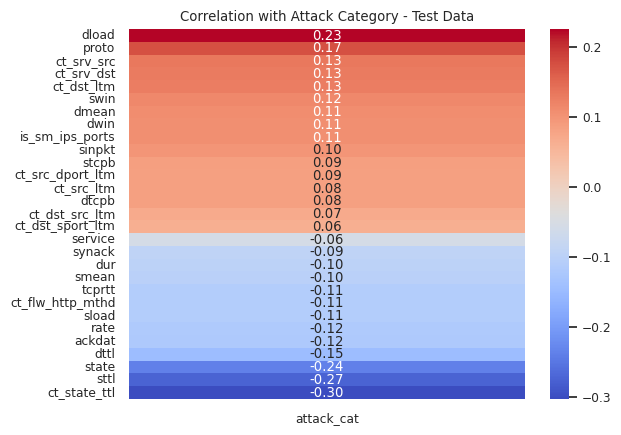

Features com correlação menor a 0.05:
Quantidade: 13
['dpkts', 'dloss', 'dbytes', 'dinpkt', 'response_body_len', 'djit', 'spkts', 'sjit', 'sloss', 'sbytes', 'ct_ftp_cmd', 'is_ftp_login', 'trans_depth']


In [8]:
corr = test.corr(numeric_only=True)
target_corr = corr['attack_cat'].drop('attack_cat')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Selecionar as features com valores de correlação maiores que 0.05 em módulo
target_corr_filtered = target_corr_sorted[abs(target_corr_sorted) >= 0.05]

# Criar uma lista com os nomes das features com valores menores que 0.05 em módulo
low_corr_features = target_corr_sorted[abs(target_corr_sorted) < 0.05].index.tolist()


# Plotar o heatmap com as features selecionadas
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_filtered.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Attack Category - Test Data')
plt.show()

# Printar o nome das features com valores menores que 0.1
print("Features com correlação menor a 0.05:")
print(f"Quantidade: {len(low_corr_features)}")
print(low_corr_features)


### Observações sobre a correlação
Podemos observar que o conjunto de treinamento identificou 24 features features com correlação menor a 0.05 e o conjunto de teste identificou 13. 

Como a correlação entre features e o target pode depender da quantidade de dados disponíveis em cada conjunto e temos um conjunto de treinamento menor que o conjunto de testes ele pode apresentar menos informações para identificar correlações, resultando em mais features com valores abaixo de 0.05.

# Análise de ganho de informação

O código apresentado realiza o processo de seleção de features usando a técnica de Information Gain. Essa técnica é comumente utilizada para a seleção de características relevantes em conjuntos de dados. O Information Gain é uma métrica que mede o ganho de informação obtido ao dividir os dados com base em uma determinada feature. Quanto maior o valor do Information Gain para uma feature, mais relevante ela é para a classificação do conjunto de dados em relação ao target (coluna "attack_cat" neste caso).

O processo de seleção de features começa calculando a entropia do conjunto de dados em relação ao target. A entropia mede a impureza dos dados e é usada como referência para medir a relevância das features. A fórmula para calcular a entropia (H) é dada por:

H(D) = - Σ (Pi * log2(Pi))

Onde Pi é a probabilidade de um dado pertencer a uma classe específica (i), e a soma é realizada para todas as classes presentes no conjunto de dados.

Em seguida, é calculada a entropia para cada feature individual, ou seja, a incerteza associada à classificação dos dados quando consideramos cada feature isoladamente. A entropia para a feature A é dada por:

H(A) = Σ (Dj / |D|) * H(Dj)

Onde Dj é o número de tuplas que possuem o valor da feature A igual a um valor específico j, e |D| é o tamanho total do conjunto de dados.

O Information Gain é obtido subtraindo a entropia da feature (H(A)) da entropia geral do conjunto de dados (H(D)). A fórmula para calcular o Information Gain (IG) é:

IG(A) = H(D) - H(A)

As features com os maiores valores de Information Gain são selecionadas para fazerem parte do conjunto reduzido de features, pois são consideradas as mais discriminativas em relação ao target.


In [9]:
# Calcular a entropia do conjunto de dados 'train'
def entropy(data):
    class_column = 'attack_cat'  # Coluna que representa a classe (target)
    counts = data[class_column].value_counts()
    total_samples = len(data)
    entropy_val = -np.sum([(count / total_samples) * np.log2(count / total_samples) for count in counts])
    return entropy_val

# Calcular a entropia para cada feature individual no conjunto de dados 'train'
def feature_entropy(data, feature):
    class_column = 'attack_cat'  # Coluna que representa a classe (target)
    values = data[feature].unique()
    feature_entropy_val = 0
    for value in values:
        subset = data[data[feature] == value]
        subset_size = len(subset)
        subset_entropy = entropy(subset)
        feature_entropy_val += (subset_size / len(data)) * subset_entropy
    return feature_entropy_val

# Calcular o Information Gain para cada feature
def information_gain(data, feature):
    dataset_entropy = entropy(data)
    feature_entropy_val = feature_entropy(data, feature)
    information_gain_val = dataset_entropy - feature_entropy_val
    return information_gain_val

# Selecionar as features com os maiores valores de Information Gain
def select_features_by_information_gain(data, num_features):
    information_gains = {}
    for feature in data.columns:
        if feature != 'attack_cat':  # Não considerar a coluna de classe como feature
            information_gain_val = information_gain(data, feature)
            information_gains[feature] = information_gain_val

    # Ordenar as features pelo valor do Information Gain em ordem decrescente
    sorted_features = sorted(information_gains.items(), key=lambda x: x[1], reverse=True)

    # Selecionar as num_features com os maiores valores de Information Gain
    selected_features = [feature for feature, _ in sorted_features[:num_features]]
    return selected_features


Como no artigo mencionado foram selecionadas 22 features a partir desse processo, vamos fazer o mesmo.

In [10]:
# Reduzir o DataFrame 'train' mantendo apenas as 22 features selecionadas
selected_features = select_features_by_information_gain(train, num_features=22)
train_reduced = train[selected_features]

# Reduzir o DataFrame 'test' mantendo apenas as 22 features selecionadas
test_reduced = test[selected_features]

# Adicionar a coluna target ('attack_cat') de volta aos DataFrames reduzidos
train_reduced['attack_cat'] = train['attack_cat']
test_reduced['attack_cat'] = test['attack_cat']

# Obter a lista de todas as features do DataFrame 'train'
all_features = train.columns.tolist()

# Remover a coluna 'attack_cat' da lista de todas as features
all_features.remove('attack_cat')

# Obter a lista de features não selecionadas
non_selected_features = [feature for feature in all_features if feature not in selected_features]

Após a aplicação do método de Information Gain, selecionamos as 22 features mais relevantes para o conjunto de dados, mantendo-as nos DataFrames 'train_reduced' e 'test_reduced'. As features selecionadas foram armazenadas na variável 'selected_features'.

As features não selecionadas, que não apresentaram alto valor de Information Gain, foram armazenadas na variável 'non_selected_features'. Com isso, podemos comparar essas listas com as features mencionadas no artigo e verificar a concordância com a seleção realizada no estudo. 


## Comparação entre as features selecionadas pela nossa análise e pela análise do artigo mencionado.

In [11]:
non_selected_features_article = ['Srcip', 'Sport', 'Dstip', 'Dstport', 'State', 'Sload', 'Dload', 'Swin', 'Dwin', 'Stcpb',
                            'Dtcpb', 'Trans_depth', 'Res_bdy_len', 'Djit', 'Stime', 'Ltime', 'Sinpkt', 'Tcprtt', 'Synack',
                            'Ackdat', 'Is_sm_ips_parts', 'Ct_ftw_http_mthd', 'Is_ftp_login', 'Ct_ftp_cmd',
                            'Ct_src_ltm']

non_selected_features_article = [feature.lower() for feature in non_selected_features_article]

selected_features_article = ['Ct_dst_ltm', 'Ct_dst_sport_ltm', 'Ct_dst_src_ltm', 'Ct_src_dport_ltm', 'Ct_srv_dst',
                                 'Ct_srv_src', 'Ct_state_ttl', 'Dbytes', 'Dinpkt', 'Dloss', 'Dmeanz', 'Dpkts', 'Dttl',
                                 'Dur', 'Proto', 'Sbytes', 'Service', 'Sjit', 'Sloss', 'Smeanz', 'spkts', 'Sttl']


selected_features_article = [feature.lower() for feature in selected_features_article]


### Comparação das features não selecionadas

In [12]:
# Verificar quais features estão presentes no non_selected_features_article
common_features = set(non_selected_features) & set(non_selected_features_article)
num_common_features = len(common_features)

# Imprimir as features comuns e a quantidade
print("Features comuns:")
print(common_features)
print(f"Quantidade: {num_common_features}")


Features comuns:
{'ct_src_ltm', 'is_ftp_login', 'swin', 'trans_depth', 'state', 'dwin', 'ct_ftp_cmd'}
Quantidade: 7


### Comparação das features selecionadas

In [13]:
# Verificar quais features estão presentes no selected_features_article
common_features = set(selected_features) & set(selected_features_article)
num_common_features = len(common_features)

# Imprimir as features comuns e a quantidade
print("Features comuns:")
print(common_features)
print(f"Quantidade: {num_common_features}")


Features comuns:
{'service', 'dur', 'dinpkt', 'proto', 'ct_dst_sport_ltm', 'dbytes', 'dpkts', 'ct_state_ttl', 'sbytes', 'sjit'}
Quantidade: 10


É interessante observar que as features selecionadas a partir da nossa análise diferem das selecionadas no artigo mencionado. Essa discrepância pode ser atribuída a possíveis diferenças de implementação no cálculo do ganho de informação.

Essas discrepâncias podem ser explicadas pelas diferentes abordagens e parâmetros utilizados nos modelos de classificação empregados no artigo, o que ressalta a importância de uma análise cuidadosa e contextualizada das features selecionadas para o problema em questão.

# Análise de Distribuição de Classes

Para visualizar a distribuição das classes da variável target 'attack_cat' nos conjuntos de treinamento e teste, utilizamos gráficos de pizza e gráficos de barras.

O gráfico de pizza mostra a proporção de cada classe em relação ao total de amostras, permitindo uma rápida visualização das distribuições relativas. O gráfico de barras apresenta o número de ocorrências de cada classe na variável target, oferecendo uma perspectiva mais clara da quantidade de amostras em cada classe.



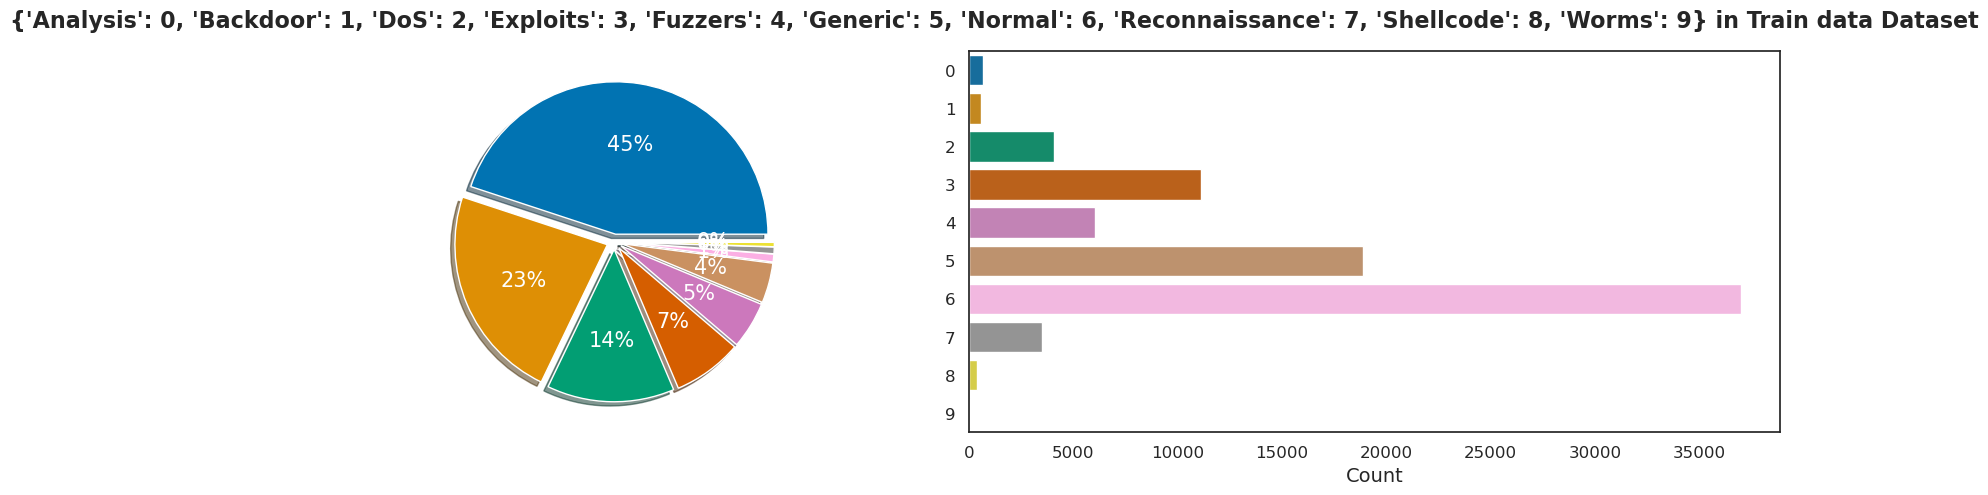

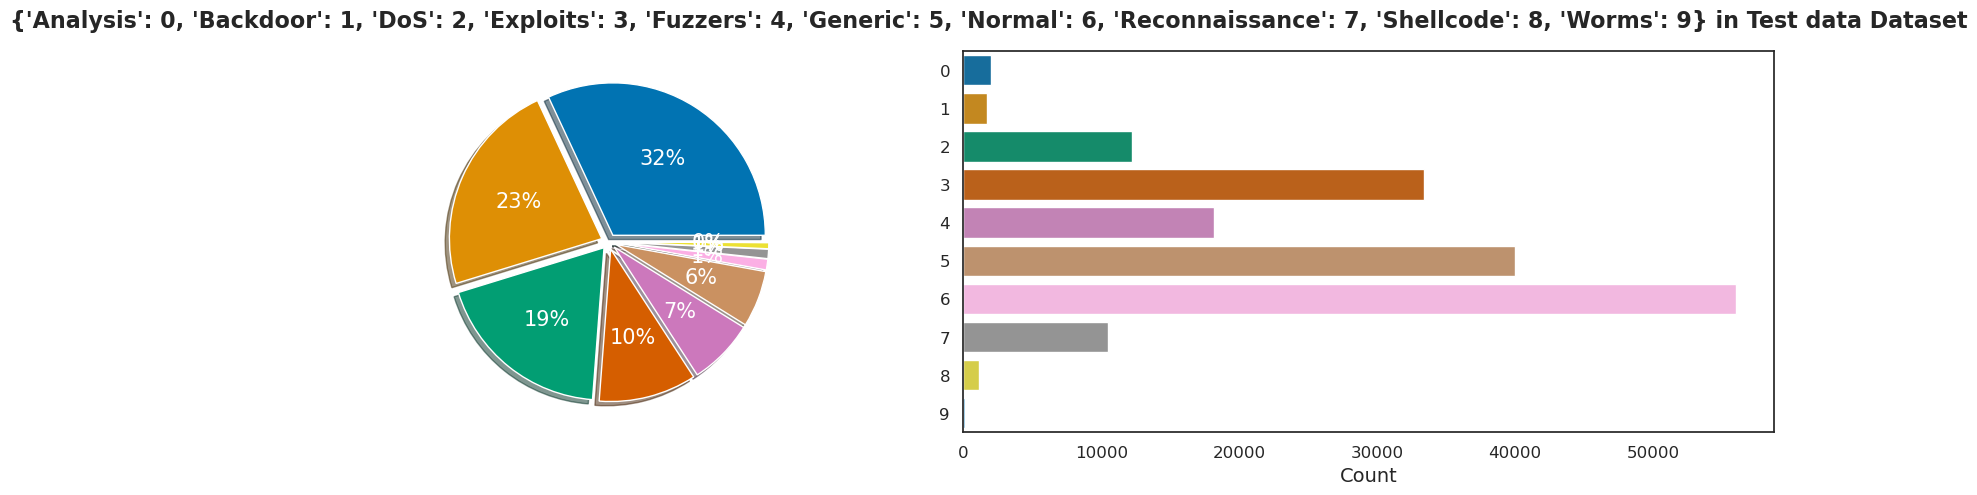

In [14]:
def plot_target_feature(df, target_col, label_encoder_mappings, figsize=(16,5), palette='colorblind', name='Train'):
    df = df.fillna('Nan')
    df = df.sort_values(target_col)

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    ax = ax.flatten()

    # Pie chart
    pie_colors = sns.color_palette(palette, len(df[target_col].unique()))
    ax[0].pie(
        df[target_col].value_counts(),
        shadow=True,
        explode=[0.05] * len(df[target_col].unique()),
        autopct='%1.f%%',
        textprops={'size': 15, 'color': 'white'},
        colors=pie_colors
    )
    ax[0].set_aspect('equal')  # Fix the aspect ratio to make the pie chart circular

    # Bar plot
    bar_colors = sns.color_palette(palette)
    sns.countplot(
        data=df,
        y=target_col,
        ax=ax[1],
        palette=bar_colors
    )
    ax[1].set_xlabel('Count', fontsize=14)
    ax[1].set_ylabel('')
    ax[1].tick_params(labelsize=12)
    ax[1].yaxis.set_tick_params(width=0)  # Remove tick lines for y-axis

    target_col_label = label_encoder_mappings[target_col]
    fig.suptitle(f'{target_col_label} in {name} Dataset', fontsize=16, fontweight='bold')
    plt.tight_layout()

    # Show the plot
    plt.show()

# Usando o label_encoder_mappings para criar o gráfico
plot_target_feature(train_reduced, 'attack_cat', label_encoder_mappings, figsize=(16,5), palette='colorblind', name='Train data')
plot_target_feature(test_reduced, 'attack_cat', label_encoder_mappings, figsize=(16,5), palette='colorblind', name='Test data')


In [15]:
# Contar a quantidade de cada classe no DataFrame 'train_reduced'
train_class_counts = train_reduced['attack_cat'].value_counts()

# Contar a quantidade de cada classe no DataFrame 'test_reduced'
test_class_counts = test_reduced['attack_cat'].value_counts()

# Exibir os resultados
print("Quantidade de cada classe no DataFrame 'train_reduced':")
print(train_class_counts)

print("\nQuantidade de cada classe no DataFrame 'test_reduced':")
print(test_class_counts)


Quantidade de cada classe no DataFrame 'train_reduced':
6    37000
5    18871
3    11132
4     6062
2     4089
7     3496
0      677
1      583
8      378
9       44
Name: attack_cat, dtype: int64

Quantidade de cada classe no DataFrame 'test_reduced':
6    56000
5    40000
3    33393
4    18184
2    12264
7    10491
0     2000
1     1746
8     1133
9      130
Name: attack_cat, dtype: int64


### Observações sobre a distribuição de classes
No artigo mencionado, foi realizado uma análise com 15 categorias de clusters, revelando que algumas categorias estavam sobrepostas. Portanto, algumas categorias foram removidas por estarem contidas em outras. Após essa remoção, apenas cinco categorias (DoS, Exploit, Generic, Probe e Normal) foram consideradas para a análise.

Relacionando as categorias do artigo com as nossas labels, os dados ficariam da seguinte forma:

1. DoS: 2
2. Exploit: 3
3. Generic: 5
4. Probe: 4
5. Normal: 6

Logo, vamos selecionar essas categorias também.

In [16]:
# Lista com as classes que serão mantidas
selected_classes = [2, 3, 5, 4, 6]

# Filtrar o DataFrame 'train_reduced' mantendo somente as classes selecionadas
train_reduced = train_reduced[train_reduced['attack_cat'].isin(selected_classes)]

# Filtrar o DataFrame 'test_reduced' mantendo somente as classes selecionadas
test_reduced = test_reduced[test_reduced['attack_cat'].isin(selected_classes)]

print(f"train shape :{train_reduced.shape}")

print(f"train shape :{test_reduced.shape}")

train shape :(77154, 23)
train shape :(159841, 23)


In [17]:
# Contar a quantidade de cada classe no DataFrame 'train_reduced'
train_class_counts = train_reduced['attack_cat'].value_counts()

# Contar a quantidade de cada classe no DataFrame 'test_reduced'
test_class_counts = test_reduced['attack_cat'].value_counts()

# Exibir os resultados
print("Quantidade de cada classe no DataFrame 'train_reduced':")
print(train_class_counts)

print("\nQuantidade de cada classe no DataFrame 'test_reduced':")
print(test_class_counts)

Quantidade de cada classe no DataFrame 'train_reduced':
6    37000
5    18871
3    11132
4     6062
2     4089
Name: attack_cat, dtype: int64

Quantidade de cada classe no DataFrame 'test_reduced':
6    56000
5    40000
3    33393
4    18184
2    12264
Name: attack_cat, dtype: int64


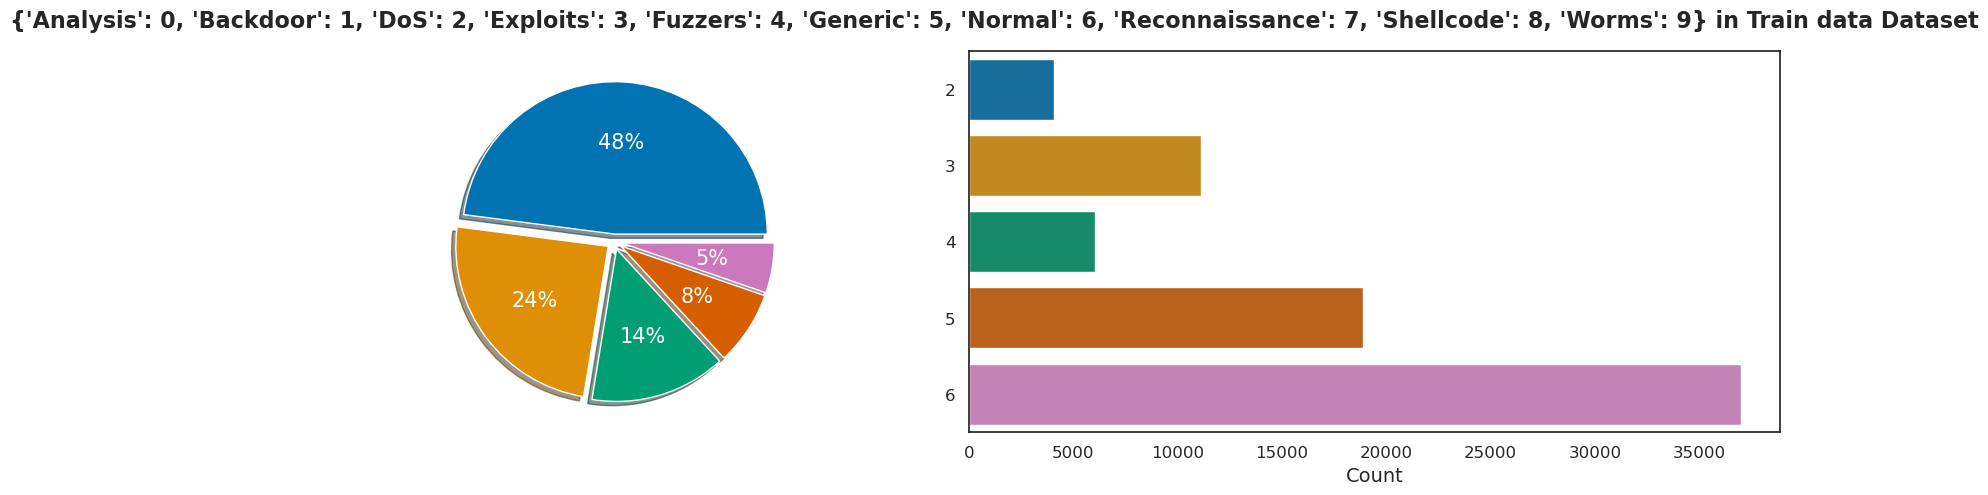

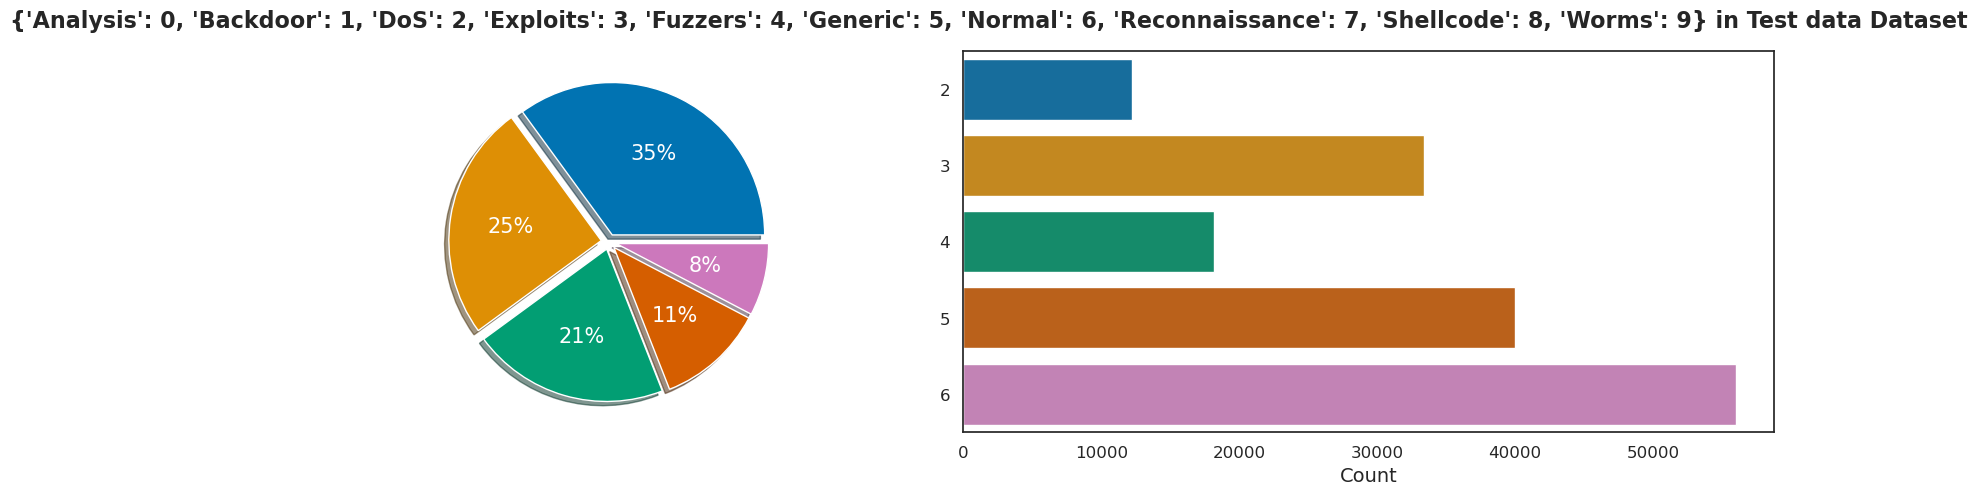

In [18]:
# Usando o label_encoder_mappings para criar o gráfico
plot_target_feature(train_reduced, 'attack_cat', label_encoder_mappings, figsize=(16,5), palette='colorblind', name='Train data')
plot_target_feature(test_reduced, 'attack_cat', label_encoder_mappings, figsize=(16,5), palette='colorblind', name='Test data')


# Gráfico de dispersão

Utilizamos o método PCA para reduzir a dimensionalidade do DataFrame `train_reduced` e `test_reduced`. Ele cria um gráfico de dispersão para visualizar os dados reduzidos em duas dimensões, colorindo-os de acordo com as classes da coluna 'attack_cat'. O gráfico de dispersão permite visualizar a separação dos dados após a redução de dimensionalidade.

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

class Decomp:
    def __init__(self, n_components, method="pca", scaler_method='standard'):
        self.n_components = n_components
        self.method = method
        self.scaler_method = scaler_method
        
    def dimension_reduction(self, df):
            
        X_reduced = self.dimension_method(df)
        df_comp = pd.DataFrame(X_reduced, columns=[f'{self.method.upper()}_{_}' for _ in range(self.n_components)], index=df.index)
        return df_comp
    
    def dimension_method(self, df):
        
        X = self.scaler(df)
        if self.method == "pca":
            pca = PCA(n_components=self.n_components, random_state=0)
            X_reduced = pca.fit_transform(X)
            self.comp = pca
        elif self.method == "nmf":
            nmf = NMF(n_components=self.n_components, random_state=0)
            X_reduced = nmf.fit_transform(X)
        elif self.method == "umap":
            comp = UMAP(n_components=self.n_components, random_state=0)
            X_reduced = comp.fit_transform(X)
        elif self.method == "ica":
            comp = FastICA(n_components=self.n_components, whiten='unit-variance', random_state=0)
            X_reduced = comp.fit_transform(X)
        else:
            raise ValueError(f"Invalid method name: {method}")
        
        return X_reduced
    
    def scaler(self, df):
        
        _df = df.copy()
            
        if self.scaler_method == "standard":
            return StandardScaler().fit_transform(_df)
        elif self.scaler_method == "minmax":
            return MinMaxScaler().fit_transform(_df)
        elif self.scaler_method == None:
            return _df.values
        else:
            raise ValueError(f"Invalid scaler_method name")
        
    def get_columns(self):
        return [f'{self.method.upper()}_{_}' for _ in range(self.n_components)]
    
    def get_explained_variance_ratio(self):
        return np.sum(self.comp.explained_variance_ratio_)
    
    def transform(self, df):
        X = self.scaler(df)
        X_reduced = self.comp.transform(X)
        df_comp = pd.DataFrame(X_reduced, columns=[f'{self.method.upper()}_{_}' for _ in range(self.n_components)], index=df.index)
        
        return df_comp
    
    def decomp_plot(self, tmp, label, hue='genre'):
        plt.figure(figsize = (16, 9))
        sns.scatterplot(x = f"{label}_0", y = f"{label}_1", data=tmp, hue=hue, alpha=0.7, s=100, palette='muted');

        plt.title(f'{label} on {hue}', fontsize = 20)
        plt.xticks(fontsize = 14)
        plt.yticks(fontsize = 10);
        plt.xlabel(f"{label} Component 1", fontsize = 15)
        plt.ylabel(f"{label} Component 2", fontsize = 15)
    

## Dispersão no conjunto de treinamento

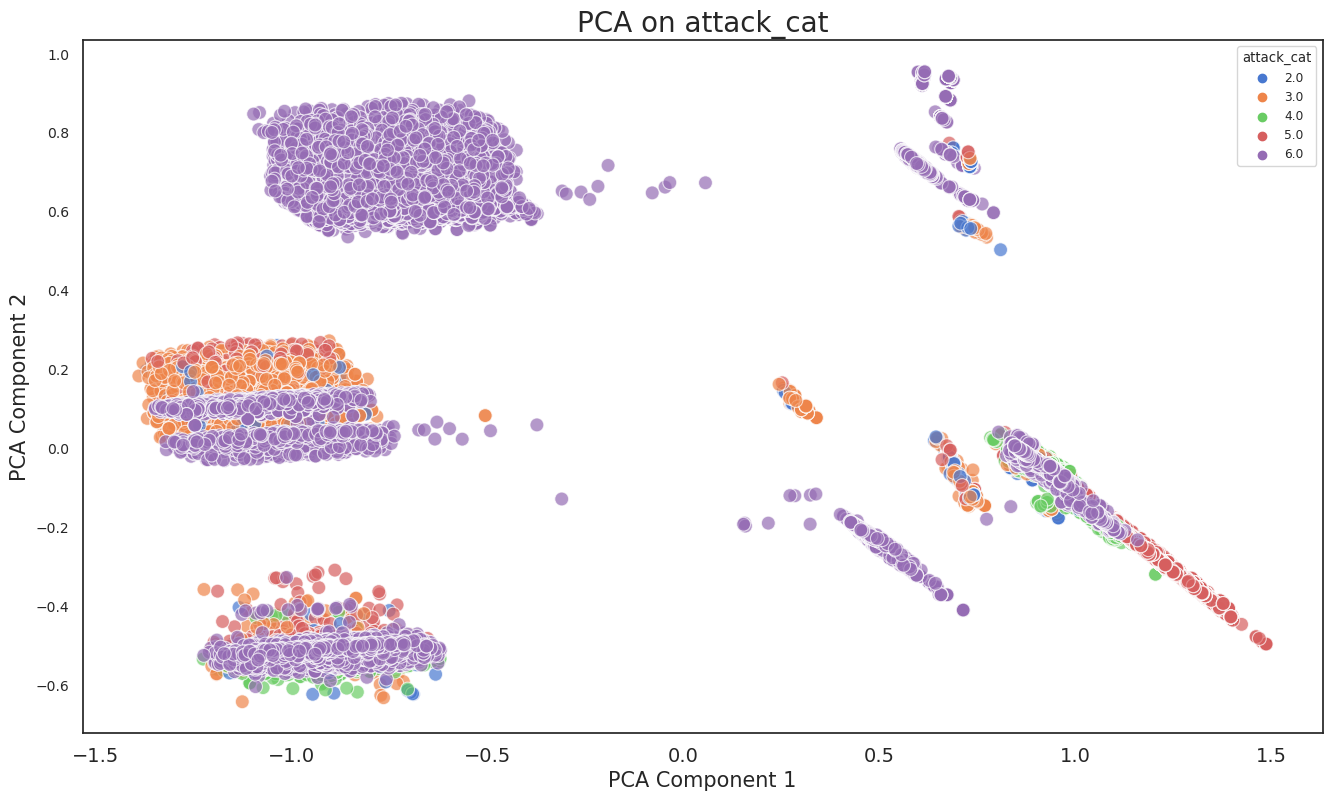

In [20]:
data = train.copy()
method = 'pca'

decomp = Decomp(n_components=2, method=method, scaler_method='minmax')
decomp_feature = decomp.dimension_reduction(data)
decomp_feature = pd.concat([train_reduced['attack_cat'], decomp_feature], axis=1)
decomp.decomp_plot(decomp_feature, method.upper(), 'attack_cat')
    
del data

## Dispersão no conjunto de treinamento após seleção das features

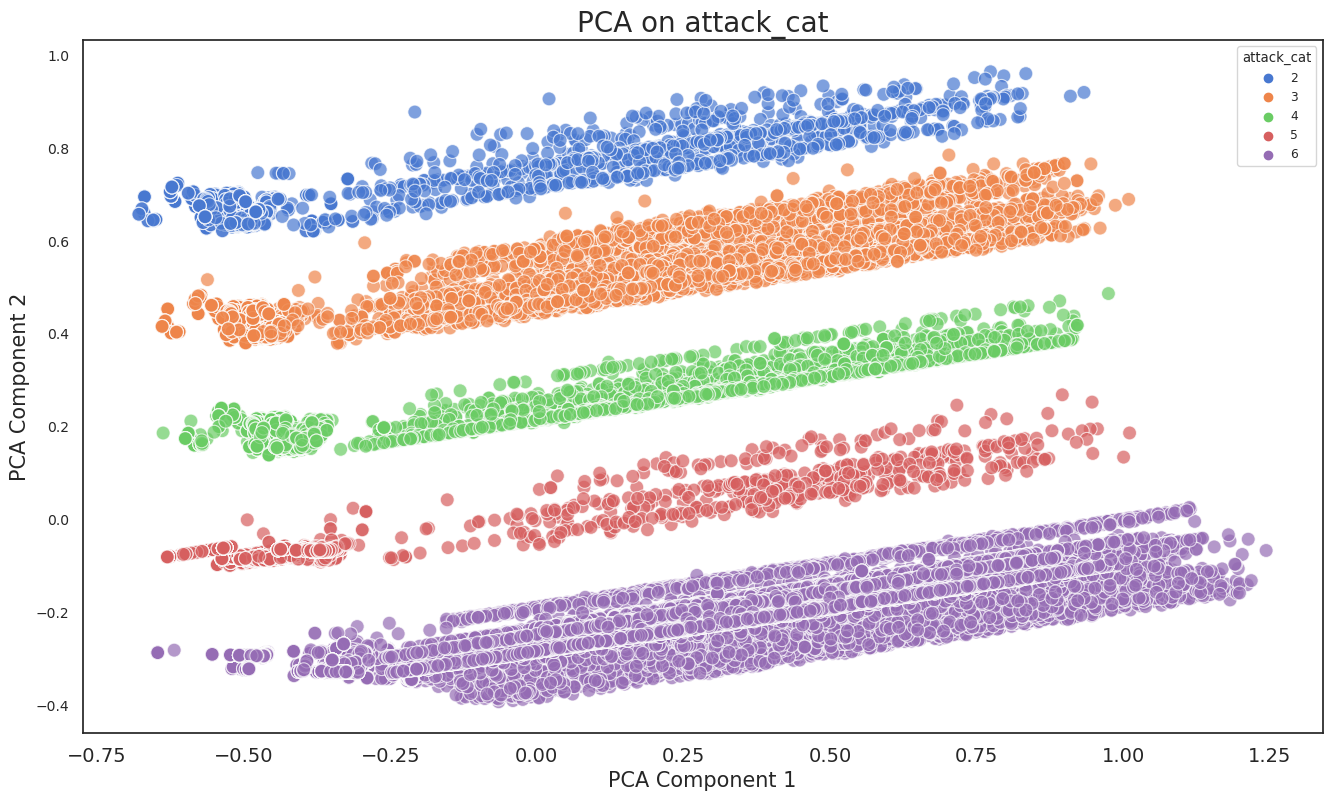

In [21]:
data = train_reduced.copy()
method = 'pca'

decomp = Decomp(n_components=2, method=method, scaler_method='minmax')
decomp_feature = decomp.dimension_reduction(data)
decomp_feature = pd.concat([train_reduced['attack_cat'], decomp_feature], axis=1)
decomp.decomp_plot(decomp_feature, method.upper(), 'attack_cat')
    
del data

## Dispersão no conjunto de teste

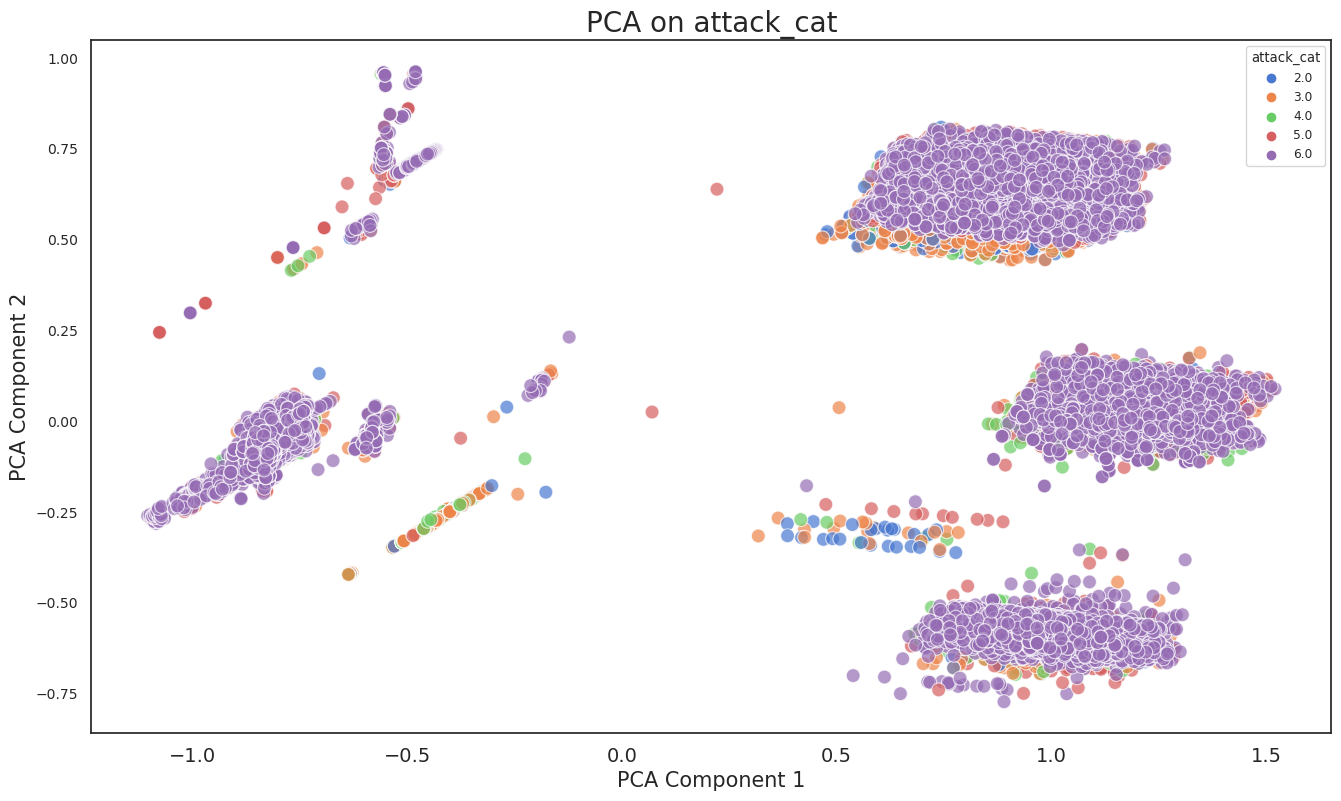

In [22]:
data = test.copy()
method = 'pca'

decomp = Decomp(n_components=2, method=method, scaler_method='minmax')
decomp_feature = decomp.dimension_reduction(data)
decomp_feature = pd.concat([train_reduced['attack_cat'], decomp_feature], axis=1)
decomp.decomp_plot(decomp_feature, method.upper(), 'attack_cat')
    
del data

## Dispersão no conjunto de treinamento após seleção das features

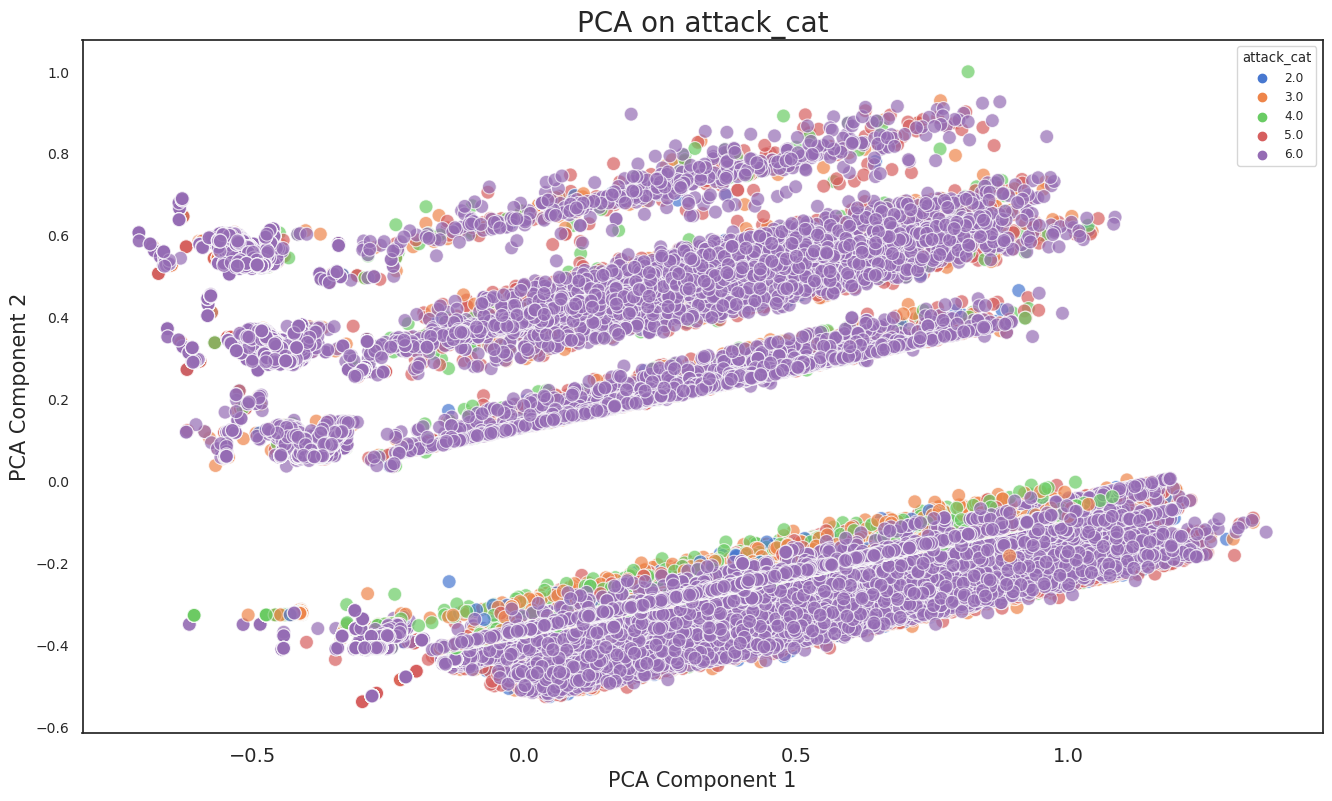

In [23]:
data = test_reduced.copy()
method = 'pca'

decomp = Decomp(n_components=2, method=method, scaler_method='minmax')
decomp_feature = decomp.dimension_reduction(data)
decomp_feature = pd.concat([train_reduced['attack_cat'], decomp_feature], axis=1)
decomp.decomp_plot(decomp_feature, method.upper(), 'attack_cat')
    
del data

### Observação em relação ao gráfico de dispersão

Após analisar o gráfico de dispersão, é possível observar que as classes no conjunto de treinamento estão bem separadas, indicando uma boa separabilidade entre os dados para o algoritmo de classificação. Porém, no conjunto de testes, é perceptível que há uma sobreposição entre as classes, o que pode apresentar desafios para o algoritmo de classificação utilizando técnicas fuzzy.

Para prosseguir com a análise, vamos gerar os datasets "Train" e "Test" ao fim dessa etapa. Esses datasets podem ser utilizados para avaliar o desempenho do algoritmo EIFUZZCND em relação à classificação das classes específicas (DoS, Exploit, Generic, Probe e Normal) e, possivelmente, lidar com a sobreposição de classes.


In [24]:
# Salvar o DataFrame train_reduced em um arquivo CSV
train_reduced_copy = train_reduced.copy()
train_reduced_copy['attack_cat'] = train_reduced_copy['attack_cat'].apply(lambda x: "{:.1f}".format(x))
train_reduced_copy.to_csv('unsw-nb15-train.csv', index=False, float_format='%.10f')

# Salvar o DataFrame test_reduced em um arquivo CSV
test_reduced_copy = test_reduced.copy()
test_reduced_copy['attack_cat'] = test_reduced_copy['attack_cat'].apply(lambda x: "{:.1f}".format(x))
test_reduced_copy.to_csv('unsw-nb15-instances.csv', index=False, float_format='%.10f')


In [25]:
# Criação do cabeçalho do arquivo ARFF
header = "@relation unsw-nb15\n"

# Obter os nomes das colunas e seus tipos
attributes = ""
for column in train_reduced.columns:
    if column == 'attack_cat':
        # Para a coluna de classe, os possíveis valores são 2.0, 3.0, 4.0, 5.0, 6.0, que representam as classes
        class_values = ','.join(str(cls) for cls in [2.0, 3.0, 4.0, 5.0, 6.0])
        attributes += f"@attribute {column} {{ {class_values} }}\n"
    else:
        attributes += f"@attribute {column} real\n"


# Criação da seção de dados
data = "@data\n"
for row in train_reduced.values:
    # Formatar cada valor com uma casa decimal na última coluna e 10 casas decimais nas demais colunas
    formatted_row = ','.join("{:.1f}".format(value) if idx == len(row) - 1 else "{:.10f}".format(value) for idx, value in enumerate(row))
    data += formatted_row + "\n"


# Concatenar tudo para formar o arquivo ARFF completo
arff_data = header + attributes + data

# Salvar o arquivo ARFF em disco
with open('unsw-nb15-train.arff', 'w') as f_train:
    f_train.write(arff_data)


In [26]:
# Criação do cabeçalho do arquivo ARFF
header = "@relation unsw-nb15\n"

# Obter os nomes das colunas e seus tipos
attributes = ""
for column in test_reduced.columns:
    if column == 'attack_cat':
        # Para a coluna de classe, os possíveis valores são 2.0, 3.0, 4.0, 5.0, 6.0, que representam as classes
        class_values = ','.join(str(cls) for cls in [2.0, 3.0, 4.0, 5.0, 6.0])
        attributes += f"@attribute {column} {{ {class_values} }}\n"
    else:
        attributes += f"@attribute {column} real\n"


# Criação da seção de dados
data = "@data\n"
for row in test_reduced.values:
    # Formatar cada valor com uma casa decimal na última coluna e 10 casas decimais nas demais colunas
    formatted_row = ','.join("{:.1f}".format(value) if idx == len(row) - 1 else "{:.10f}".format(value) for idx, value in enumerate(row))
    data += formatted_row + "\n"

# Concatenar tudo para formar o arquivo ARFF completo
arff_data = header + attributes + data

# Salvar o arquivo ARFF em disco
with open('unsw-nb15-instances.arff', 'w') as f_test:
    f_test.write(arff_data)


# Avaliação de Modelos Treinados com Aprendizado de Máquina Clássico

Nesta etapa, vamos validar diferentes modelos de aprendizado de máquina clássico utilizando diferentes configurações de dados. Vamos considerar as seguintes abordagens:

1. **Base de Dados Unida:** Nesta abordagem, uniremos as bases de dados de treinamento (train) e teste (test) em um único conjunto de dados e treinaremos os modelos utilizando essa base completa.

2. **Base de Dados Unida e Reduzida:** Nesta abordagem, utilizaremos as bases de dados de treinamento (train_reduced) e teste (test_reduced) após aplicarmos o processo de seleção de features. Os modelos serão treinados com essa base de dados reduzida.

3. **Base de Dados de Treinamento:** Nesta abordagem, treinaremos os modelos utilizando a base de dados de treinamento original (train) e a base de treinamento reduzida (train_reduced).

4. **Base de Dados de Teste:** Nesta abordagem, treinaremos os modelos utilizando a base de dados de teste original (test)  e a base de dados de teste reduzida (test_reduced).

5. **Base de Dados Separadas:** Nesta abordagem, os modelos serão treinados com duas bases de dados separadas, sendo uma com os dados de treinamento originais (train) e outra com os dados reduzidos (train_reduced), além das bases de teste correspondentes.

Os modelos treinados serão: FuzzyCmeans, FuzzyKNN, Random Forest, C5 e GradientBoost. Vamos avaliar a acurácia de cada modelo em cada cenário para ter uma previsão do desempenho esperado na construção do modelo de fluxo de dados.


In [27]:
# Base de Dados Unida
df_unido = pd.concat([train, test], ignore_index=True)

# Base de Dados Unida e Reduzida
df_unido_reduzido = pd.concat([train_reduced, test_reduced], ignore_index=True)

# Base de Dados de Treinamento
df_treinamento = train.copy()
df_treinamento_reduzido = train_reduced.copy()

# Base de Dados de Teste
df_teste = test.copy()
df_teste_reduzido = test_reduced.copy()

In [28]:
!pip install scikit-fuzzy
!pip install fuzzy-c-means
!pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=4d07dc43a2bc72a3aea4e45eebeaaf27c47239fed07732b3dc6b215b22a42ab8
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy
  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully uninstalled typer-0.9.0
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kfp 2.0.1 requires google-cloud-storage<3,>=2.2.1, but you have google-cloud-stor

In [29]:
from fcmeans import FCM
import skfuzzy as fuzz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def train_and_evaluate_models(df, df_name):
    # Separar as features e a classe
    X = df.drop('attack_cat', axis=1).values
    y = df['attack_cat'].values
    n_classes = len(np.unique(y))
    
    # Dividir os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # FCM
    fcm = FCM(n_clusters = n_classes)
    fcm.fit(X_train)
    fcm_predictions = fcm.predict(X_test)
    fcm_accuracy = accuracy_score(y_test, fcm_predictions)
    print(f"{df_name} - FCM Accuracy: {fcm_accuracy:.2f}")

    # FKNN
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_train.T, c = n_classes, m=2, error=0.005, maxiter=1000)
    fknn_predictions = np.argmax(u, axis=0)
    fknn_accuracy = accuracy_score(y_train, fknn_predictions)
    print(f"{df_name} - FKNN Accuracy: {fknn_accuracy:.2f}")

    # Random Forest
    random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
    random_forest_model.fit(X_train, y_train)
    random_forest_predictions = random_forest_model.predict(X_test)
    random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
    print(f"{df_name} - Random Forest Accuracy: {random_forest_accuracy:.2f}")

    # C5 (Árvore de decisão)
    c5_model = DecisionTreeClassifier(random_state=42)
    c5_model.fit(X_train, y_train)
    c5_predictions = c5_model.predict(X_test)
    c5_accuracy = accuracy_score(y_test, c5_predictions)
    print(f"{df_name} - C5 Accuracy: {c5_accuracy:.2f}")

    # HistGradientBoostingClassifier
    hist_gradient_boosting_model = HistGradientBoostingClassifier(random_state=42)
    hist_gradient_boosting_model.fit(X_train, y_train)
    hist_gradient_boosting_predictions = hist_gradient_boosting_model.predict(X_test)
    hist_gradient_boosting_accuracy = accuracy_score(y_test, hist_gradient_boosting_predictions)
    print(f"{df_name} - HistGradientBoostingClassifier Accuracy: {hist_gradient_boosting_accuracy:.2f}")

In [30]:
train_and_evaluate_models(df_unido, "Base de Dados Unida")
train_and_evaluate_models(df_unido_reduzido, "Base de Dados Unida e Reduzida")
train_and_evaluate_models(df_treinamento, "Base de Dados de Treinamento")
train_and_evaluate_models(df_treinamento_reduzido, "Base de Dados de Treinamento Reduzida")
train_and_evaluate_models(df_teste, "Base de Dados de Teste")
train_and_evaluate_models(df_teste_reduzido, "Base de Dados de Teste Reduzida")

Base de Dados Unida - FCM Accuracy: 0.06
Base de Dados Unida - FKNN Accuracy: 0.04
Base de Dados Unida - Random Forest Accuracy: 0.84
Base de Dados Unida - C5 Accuracy: 0.82
Base de Dados Unida - HistGradientBoostingClassifier Accuracy: 0.83
Base de Dados Unida e Reduzida - FCM Accuracy: 0.10
Base de Dados Unida e Reduzida - FKNN Accuracy: 0.10
Base de Dados Unida e Reduzida - Random Forest Accuracy: 0.85
Base de Dados Unida e Reduzida - C5 Accuracy: 0.83
Base de Dados Unida e Reduzida - HistGradientBoostingClassifier Accuracy: 0.85
Base de Dados de Treinamento - FCM Accuracy: 0.15
Base de Dados de Treinamento - FKNN Accuracy: 0.06
Base de Dados de Treinamento - Random Forest Accuracy: 0.87
Base de Dados de Treinamento - C5 Accuracy: 0.85
Base de Dados de Treinamento - HistGradientBoostingClassifier Accuracy: 0.87
Base de Dados de Treinamento Reduzida - FCM Accuracy: 0.04
Base de Dados de Treinamento Reduzida - FKNN Accuracy: 0.07
Base de Dados de Treinamento Reduzida - Random Forest A

In [31]:
def train_and_evaluate_models_2(X_train, X_test, y_train, y_test, df_name):
    n_classes = len(np.unique(y_train))
    
    # FCM
    fcm = FCM(n_clusters = n_classes)
    fcm.fit(X_train)
    fcm_predictions = fcm.predict(X_test)
    fcm_accuracy = accuracy_score(y_test, fcm_predictions)
    print(f"{df_name} - FCM Accuracy: {fcm_accuracy:.2f}")

    # FKNN
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_train.T, c = n_classes, m=2, error=0.005, maxiter=1000)
    fknn_predictions = np.argmax(u, axis=0)
    fknn_accuracy = accuracy_score(y_train, fknn_predictions)
    print(f"{df_name} - FKNN Accuracy: {fknn_accuracy:.2f}")

    # Random Forest
    random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
    random_forest_model.fit(X_train, y_train)
    random_forest_predictions = random_forest_model.predict(X_test)
    random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
    print(f"{df_name} - Random Forest Accuracy: {random_forest_accuracy:.2f}")

    # C5 (Árvore de decisão)
    c5_model = DecisionTreeClassifier(random_state=42)
    c5_model.fit(X_train, y_train)
    c5_predictions = c5_model.predict(X_test)
    c5_accuracy = accuracy_score(y_test, c5_predictions)
    print(f"{df_name} - C5 Accuracy: {c5_accuracy:.2f}")

    # HistGradientBoostingClassifier
    hist_gradient_boosting_model = HistGradientBoostingClassifier(random_state=42)
    hist_gradient_boosting_model.fit(X_train, y_train)
    hist_gradient_boosting_predictions = hist_gradient_boosting_model.predict(X_test)
    hist_gradient_boosting_accuracy = accuracy_score(y_test, hist_gradient_boosting_predictions)
    print(f"{df_name} - HistGradientBoostingClassifier Accuracy: {hist_gradient_boosting_accuracy:.2f}")

In [32]:
X_train = df_treinamento.drop('attack_cat', axis=1).values
y_train = df_treinamento['attack_cat'].values
X_test = df_teste.drop('attack_cat', axis=1).values
y_test = df_teste['attack_cat'].values
train_and_evaluate_models_2(X_train, X_test, y_train, y_test, "Base de dados Separadas")

Base de dados Separadas - FCM Accuracy: 0.12
Base de dados Separadas - FKNN Accuracy: 0.28
Base de dados Separadas - Random Forest Accuracy: 0.75
Base de dados Separadas - C5 Accuracy: 0.73
Base de dados Separadas - HistGradientBoostingClassifier Accuracy: 0.75


In [33]:
X_train_reduced = df_treinamento_reduzido.drop('attack_cat', axis=1).values
y_train_reduced = df_treinamento_reduzido['attack_cat'].values
X_test_reduced = df_teste_reduzido.drop('attack_cat', axis=1).values
y_test_reduced = df_teste_reduzido['attack_cat'].values
train_and_evaluate_models_2(X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced, "Base de dados Separadas Reduzida")

Base de dados Separadas Reduzida - FCM Accuracy: 0.05
Base de dados Separadas Reduzida - FKNN Accuracy: 0.06
Base de dados Separadas Reduzida - Random Forest Accuracy: 0.79
Base de dados Separadas Reduzida - C5 Accuracy: 0.78
Base de dados Separadas Reduzida - HistGradientBoostingClassifier Accuracy: 0.80


### Observação sobre modelos

A baixa acurácia dos algoritmos que utilizam abordagem fuzzy, como o Fuzzy K-NN, em comparação com algoritmos como Gradient Boosting e Random Forest pode ser explicada principalmente pela presença de muita sobreposição entre as classes no conjunto de dados.

Os algoritmos de aprendizagem de máquina fuzzy são projetados para lidar com incerteza e sobreposição entre as classes, mas sua eficácia pode ser comprometida quando a sobreposição é muito intensa. Quando as fronteiras entre as classes são menos definidas e as instâncias de diferentes classes estão mais misturadas, os algoritmos fuzzy podem ter dificuldade em fazer previsões precisas.

Por outro lado, algoritmos como Gradient Boosting e Random Forest têm a capacidade de capturar relações complexas e não lineares entre as variáveis, tornando-os mais robustos em situações de alta sobreposição. Esses algoritmos geralmente dividem o espaço de características em regiões menores e podem se ajustar a padrões complexos, mesmo quando as classes estão sobrepostas.

Além disso, a eficácia de qualquer algoritmo de aprendizagem de máquina também depende da qualidade e quantidade de dados disponíveis para treinamento. Se o conjunto de dados for pequeno ou não representativo o suficiente das classes, todos os algoritmos, incluindo os fuzzy, podem enfrentar dificuldades em aprender relações precisas.

Em resumo, a baixa acurácia dos algoritmos fuzzy pode ser atribuída à intensa sobreposição entre as classes no conjunto de dados, que torna a tarefa de classificação mais desafiadora para esses modelos. Enquanto isso, algoritmos como Gradient Boosting e Random Forest, com sua capacidade de capturar padrões complexos, podem ser mais adequados para problemas com alta sobreposição de classes.

## Avaliação do MOA3

Como o MOA3 já é um dataset conhecido, onde utilizando nosso algoritmo obtivemos bons resultados. Vamos comparar o desemepenho dos modelos propostos utilizando esse dataset.

In [34]:
# Load Data
filepath = '/kaggle/input/moa3-datastream/'

moa_train = pd.read_csv(os.path.join(filepath, 'moa-train.csv'),header = None)
moa_test = pd.read_csv(os.path.join(filepath, 'moa-instances.csv'),header = None)

In [35]:
def train_and_evaluate_moa(df, df_name):
    # Drop da última coluna do conjunto de treinamento
    X = df.drop(df.columns[-1], axis=1).values
    y = df.iloc[:, -1].values
    n_classes = len(np.unique(y))
    
    # Dividir os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # FCM
    fcm = FCM(n_clusters = n_classes)
    fcm.fit(X_train)
    fcm_predictions = fcm.predict(X_test)
    fcm_accuracy = accuracy_score(y_test, fcm_predictions)
    print(f"{df_name} - FCM Accuracy: {fcm_accuracy:.2f}")

    # FKNN
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_train.T, c = n_classes, m=2, error=0.005, maxiter=1000)
    fknn_predictions = np.argmax(u, axis=0)
    fknn_accuracy = accuracy_score(y_train, fknn_predictions)
    print(f"{df_name} - FKNN Accuracy: {fknn_accuracy:.2f}")

    # Random Forest
    random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
    random_forest_model.fit(X_train, y_train)
    random_forest_predictions = random_forest_model.predict(X_test)
    random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
    print(f"{df_name} - Random Forest Accuracy: {random_forest_accuracy:.2f}")

    # C5 (Árvore de decisão)
    c5_model = DecisionTreeClassifier(random_state=42)
    c5_model.fit(X_train, y_train)
    c5_predictions = c5_model.predict(X_test)
    c5_accuracy = accuracy_score(y_test, c5_predictions)
    print(f"{df_name} - C5 Accuracy: {c5_accuracy:.2f}")

    # HistGradientBoostingClassifier
    hist_gradient_boosting_model = HistGradientBoostingClassifier(random_state=42)
    hist_gradient_boosting_model.fit(X_train, y_train)
    hist_gradient_boosting_predictions = hist_gradient_boosting_model.predict(X_test)
    hist_gradient_boosting_accuracy = accuracy_score(y_test, hist_gradient_boosting_predictions)
    print(f"{df_name} - HistGradientBoostingClassifier Accuracy: {hist_gradient_boosting_accuracy:.2f}")

In [36]:
train_and_evaluate_moa(moa_train, "Base de dados MOA")

Base de dados MOA - FCM Accuracy: 1.00
Base de dados MOA - FKNN Accuracy: 0.00
Base de dados MOA - Random Forest Accuracy: 1.00
Base de dados MOA - C5 Accuracy: 1.00
Base de dados MOA - HistGradientBoostingClassifier Accuracy: 1.00


### Observações sobre MOA

Como podemos observar, os resultados obtidos com o dataset MOA foram promissores em todos os modelos avaliados. No entanto, o valor de acurácia mais importante para o nosso cenário é o do algoritmo FCM (Fuzzy C-Means), pois é utilizado tanto na fase offline quanto na fase online para clusterização dos dados e posterior sumarização desses clusters em SPFMIC.

Na fase offline, correspondente ao conjunto de treinamento, esperamos que o FCM atinja uma acurácia superior a 50%. No entanto, como visto anteriormente, alcançamos resultados abaixo desse valor. Isso pode ser devido a diversos fatores, como a sobreposição entre as classes e a complexidade dos dados, que podem dificultar a clusterização.

Vale ressaltar que o artigo de referência atingiu uma taxa de 97.5% de acurácia utilizando o algoritmo C5 (Árvore de Decisão) em nosso mesmo conjunto de dados. No entanto, nossas análises atingiram uma acurácia de aproximadamente 87% sem a realização de otimização de hiperparâmetros. Acredita-se que com a devida otimização, seja possível alcançar resultados mais próximos aos do artigo.

Outro ponto importante a ser considerado é a análise das métricas utilizadas para a avaliação dos modelos. Neste contexto, é essencial realizar uma análise detalhada das métricas de desempenho, como precisão, recall, F1-score, matriz de confusão, entre outras, para compreender melhor a capacidade de generalização dos modelos em cenários mais complexos e identificar possíveis desafios e áreas de melhoria.

##### Análise de métricas do artigo mencionado

O artigo concentra-se na avaliação de desempenho de vários modelos de classificação (C5, CHAID, CART, QUEST) usando o conjunto de dados reduzido. O desempenho de cada modelo é analisado com base nas métricas de acurácia, Taxa de Detecção de Intrusão (TDI) e Taxa de Alarme Falso (TAF), calculadas usando as seguintes equações:

- Acurácia: Essa métrica representa o número de instâncias de dados corretamente classificadas em relação ao total de entradas.

  Acurácia = (TP + TN) / (TP + TN + FP + FN)

- Taxa de Detecção de Intrusão (TDI): Essa métrica representa o número de ataques corretamente classificados em relação ao total de ataques, independentemente de estarem corretamente ou incorretamente classificados.

  TDI = TP / (TP + FN)

- Taxa de Alarme Falso (TAF): Essa métrica representa o valor médio da Taxa de Falsos Positivos (TFP) e da Taxa de Falsos Negativos (TFN).

  TFP = FP / (FP + TN)
  
  TFN = FN / (FN + TP)
  
  TAF = (TFP + TFN) / 2


### Observações sobre métricas 

O algoritmo destaca a taxa de TDI como 99.37% porém é importante ressaltar que essa métrica aborda o problema como uma classificação binária. Se observarmos a taxa de acurácia, obtivemos resultados similares em nossa análise.

Essa observação é importante pois devemos levar isso em consideração quando pensarmos na abordagem que será utilizada para o cenário de fluxo de dados.

# Classificação binária 

In [37]:
def train_and_evaluate_models_binary(df, df_name):
    # Mapear as classes para valores binários
    class_mapping = {6: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 7: 1, 8: 1, 9: 1, 0: 1}
    df['target'] = df['attack_cat'].map(class_mapping)
    
    # Separar as features e a classe
    X = df.drop(['attack_cat', 'target'], axis=1).values
    y = df['target'].values
    n_classes = len(np.unique(y))

    # Dividir os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # FCM
    fcm = FCM(n_clusters = n_classes)
    fcm.fit(X_train)
    fcm_predictions = fcm.predict(X_test)
    fcm_accuracy = accuracy_score(y_test, fcm_predictions)
    print(f"{df_name} - FCM Accuracy: {fcm_accuracy:.2f}")

    # FKNN
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_train.T, c = n_classes, m=2, error=0.005, maxiter=1000)
    fknn_predictions = np.argmax(u, axis=0)
    fknn_accuracy = accuracy_score(y_train, fknn_predictions)
    print(f"{df_name} - FKNN Accuracy: {fknn_accuracy:.2f}")

    # Random Forest
    random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
    random_forest_model.fit(X_train, y_train)
    random_forest_predictions = random_forest_model.predict(X_test)
    random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
    print(f"{df_name} - Random Forest Accuracy: {random_forest_accuracy:.2f}")

    # C5 (Árvore de decisão)
    c5_model = DecisionTreeClassifier(random_state=42)
    c5_model.fit(X_train, y_train)
    c5_predictions = c5_model.predict(X_test)
    c5_accuracy = accuracy_score(y_test, c5_predictions)
    print(f"{df_name} - C5 Accuracy: {c5_accuracy:.2f}")

    # HistGradientBoostingClassifier
    hist_gradient_boosting_model = HistGradientBoostingClassifier(random_state=42)
    hist_gradient_boosting_model.fit(X_train, y_train)
    hist_gradient_boosting_predictions = hist_gradient_boosting_model.predict(X_test)
    hist_gradient_boosting_accuracy = accuracy_score(y_test, hist_gradient_boosting_predictions)
    print(f"{df_name} - HistGradientBoostingClassifier Accuracy: {hist_gradient_boosting_accuracy:.2f}")

In [38]:
train_and_evaluate_models_binary(df_unido, "Base de Dados Unida")
train_and_evaluate_models_binary(df_unido_reduzido, "Base de Dados Unida e Reduzida")
train_and_evaluate_models_binary(df_treinamento, "Base de Dados de Treinamento")
train_and_evaluate_models_binary(df_treinamento_reduzido, "Base de Dados de Treinamento Reduzida")
train_and_evaluate_models_binary(df_teste, "Base de Dados de Teste")
train_and_evaluate_models_binary(df_teste_reduzido, "Base de Dados de Teste Reduzida")

Base de Dados Unida - FCM Accuracy: 0.34
Base de Dados Unida - FKNN Accuracy: 0.66
Base de Dados Unida - Random Forest Accuracy: 0.97
Base de Dados Unida - C5 Accuracy: 0.96
Base de Dados Unida - HistGradientBoostingClassifier Accuracy: 0.96
Base de Dados Unida e Reduzida - FCM Accuracy: 0.67
Base de Dados Unida e Reduzida - FKNN Accuracy: 0.66
Base de Dados Unida e Reduzida - Random Forest Accuracy: 0.94
Base de Dados Unida e Reduzida - C5 Accuracy: 0.93
Base de Dados Unida e Reduzida - HistGradientBoostingClassifier Accuracy: 0.94
Base de Dados de Treinamento - FCM Accuracy: 0.35
Base de Dados de Treinamento - FKNN Accuracy: 0.35
Base de Dados de Treinamento - Random Forest Accuracy: 0.98
Base de Dados de Treinamento - C5 Accuracy: 0.97
Base de Dados de Treinamento - HistGradientBoostingClassifier Accuracy: 0.98
Base de Dados de Treinamento Reduzida - FCM Accuracy: 0.65
Base de Dados de Treinamento Reduzida - FKNN Accuracy: 0.65
Base de Dados de Treinamento Reduzida - Random Forest A

In [39]:
def train_and_evaluate_models_binary_2(X_train, X_test, y_train, y_test, df_name):
    n_classes = len(np.unique(y_train))
    
    # FCM
    fcm = FCM(n_clusters = n_classes)
    fcm.fit(X_train)
    fcm_predictions = fcm.predict(X_test)
    fcm_accuracy = accuracy_score(y_test, fcm_predictions)
    print(f"{df_name} - FCM Accuracy: {fcm_accuracy:.2f}")

    # FKNN
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_train.T, c = n_classes, m=2, error=0.005, maxiter=1000)
    fknn_predictions = np.argmax(u, axis=0)
    fknn_accuracy = accuracy_score(y_train, fknn_predictions)
    print(f"{df_name} - FKNN Accuracy: {fknn_accuracy:.2f}")

    # Random Forest
    random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
    random_forest_model.fit(X_train, y_train)
    random_forest_predictions = random_forest_model.predict(X_test)
    random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
    print(f"{df_name} - Random Forest Accuracy: {random_forest_accuracy:.2f}")

    # C5 (Árvore de decisão)
    c5_model = DecisionTreeClassifier(random_state=42)
    c5_model.fit(X_train, y_train)
    c5_predictions = c5_model.predict(X_test)
    c5_accuracy = accuracy_score(y_test, c5_predictions)
    print(f"{df_name} - C5 Accuracy: {c5_accuracy:.2f}")

    # HistGradientBoostingClassifier
    hist_gradient_boosting_model = HistGradientBoostingClassifier(random_state=42)
    hist_gradient_boosting_model.fit(X_train, y_train)
    hist_gradient_boosting_predictions = hist_gradient_boosting_model.predict(X_test)
    hist_gradient_boosting_accuracy = accuracy_score(y_test, hist_gradient_boosting_predictions)
    print(f"{df_name} - HistGradientBoostingClassifier Accuracy: {hist_gradient_boosting_accuracy:.2f}")

In [40]:
# Mapear as classes para valores binários
class_mapping = {6: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 7: 1, 8: 1, 9: 1, 0: 1}
df_treinamento['target'] = df_treinamento['attack_cat'].map(class_mapping)
df_teste['target'] = df_teste['attack_cat'].map(class_mapping)


X_train = df_treinamento.drop(['attack_cat', 'target'], axis=1).values
y_train = df_treinamento['target'].values
X_test = df_teste.drop(['attack_cat', 'target'], axis=1).values
y_test = df_teste['target'].values
train_and_evaluate_models_2(X_train, X_test, y_train, y_test, "Base de dados Separadas")

Base de dados Separadas - FCM Accuracy: 0.67
Base de dados Separadas - FKNN Accuracy: 0.65
Base de dados Separadas - Random Forest Accuracy: 0.90
Base de dados Separadas - C5 Accuracy: 0.90
Base de dados Separadas - HistGradientBoostingClassifier Accuracy: 0.91


In [41]:
# Mapear as classes para valores binários
class_mapping = {6: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 7: 1, 8: 1, 9: 1, 0: 1}
df_treinamento_reduzido['target'] = df_treinamento_reduzido['attack_cat'].map(class_mapping)
df_teste_reduzido['target'] = df_teste_reduzido['attack_cat'].map(class_mapping)

X_train_reduced = df_treinamento_reduzido.drop(['attack_cat', 'target'], axis=1).values
y_train_reduced = df_treinamento_reduzido['target'].values
X_test_reduced = df_teste_reduzido.drop(['attack_cat', 'target'], axis=1).values
y_test_reduced = df_teste_reduzido['target'].values
train_and_evaluate_models_2(X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced, "Base de dados Separadas Reduzida")

Base de dados Separadas Reduzida - FCM Accuracy: 0.67
Base de dados Separadas Reduzida - FKNN Accuracy: 0.65
Base de dados Separadas Reduzida - Random Forest Accuracy: 0.91
Base de dados Separadas Reduzida - C5 Accuracy: 0.91
Base de dados Separadas Reduzida - HistGradientBoostingClassifier Accuracy: 0.92


### Observações sobre classificação binária 

Ao realizar a classificação binária, notamos que os algoritmos que utilizam lógica fuzzy apresentaram valores melhores de acurácia, alcançando até 0.67. No entanto, é importante ressaltar que esse valor ainda se mantém menor do que os obtidos pelos outros modelos avaliados.

# Conclusão

Nesta análise, exploramos detalhadamente o dataset em questão e replicamos o processo de seleção de features e redução no número de classes realizado no artigo de referência. Durante o processo, identificamos algumas questões relevantes:

- Features Faltantes: Encontramos quatro features relacionadas ao IP que apresentavam valores faltantes, o que pode impactar a análise e os resultados dos modelos.

- Seleção de Features: Ao utilizar técnicas de análise de correlação e ganho de informação, selecionamos um conjunto de variáveis diferente do artigo. Isso pode afetar a performance dos modelos e destacou a importância de adaptar as escolhas de features de acordo com o contexto.

- Distribuição dos Conjuntos: Após aplicar o PCA (Principal Component Analysis), observamos uma clara separação de grupos no conjunto de treinamento, mas no conjunto de teste encontramos uma intensa sobreposição de classes. Essa sobreposição pode dificultar o desempenho dos algoritmos com abordagem fuzzy.

Na sequência, validamos diversos modelos com diferentes cenários, incluindo os algoritmos fuzzy FCM e FKNN, assim como RandomForest e GradientBoost. Os resultados mostraram que os algoritmos com abordagem fuzzy tiveram um desempenho inferior quando comparados aos algoritmos tradicionais. Essa constatação é relevante, especialmente considerando que o FCM é utilizado tanto na fase offline quanto na fase online para agrupar os exemplos, o que pode indicar que baixo desempenho nos testes pode se refletir no cenário de fluxo de dados.

Além disso, comparamos as métricas utilizadas no trabalho referenciado e notamos que uma delas aborda o problema como uma classificação binária (Taxa de Detecção de Intrusão - TDI), enquanto a outra considera uma classificação multiclasse (acurácia). Com isso em mente, obtivemos resultados próximos ao artigo quando analisamos o algoritmo C5.

# Otimização de hiperparametros com optuna

Como não obtivemos bons resultados com o algoritmo fuzzy, vamos tentar otimizar hiperparametros para tentar otimizar o modelo.

## Classificação Binária

In [42]:
import optuna

def run_fcm(X_train, X_test, y_test, m):
    n_classes = len(np.unique(y_test))
    fcm = FCM(n_clusters=n_classes, m=m)
    fcm.fit(X_train)
    fcm_predictions = fcm.predict(X_test)
    fcm_accuracy = accuracy_score(y_test, fcm_predictions)
    return fcm_accuracy

def objective_fcm_original(trial):
    m = trial.suggest_float('m', 1.1, 5.0)  # Sugere valores de m no intervalo [1.1, 5.0]
    fcm_accuracy = run_fcm(X_train, X_test, y_test, m)
    return fcm_accuracy

def objective_fcm_reduced(trial):
    m = trial.suggest_float('m', 1.1, 5.0)  # Sugere valores de m no intervalo [1.1, 5.0]
    fcm_accuracy = run_fcm(X_train_reduced, X_test_reduced, y_test_reduced, m)
    return fcm_accuracy

In [43]:
# Criar o estudo do Optuna para otimização
study = optuna.create_study(direction='maximize')  # Queremos maximizar a acurácia
study.optimize(objective_fcm_original, n_trials=10)  # Executar a busca com 10 iterações

# Melhor valor de m encontrado
best_m = study.best_params['m']
best_accuracy = study.best_value

print(f"Melhor valor de m: {best_m:.2f}")
print(f"Acurácia correspondente: {best_accuracy:.2f}")


[I 2023-07-26 21:24:57,987] A new study created in memory with name: no-name-76fbfd30-d38f-45b9-885c-1efb0845bc28
[I 2023-07-26 21:25:01,160] Trial 0 finished with value: 0.33486748678289735 and parameters: {'m': 1.287991312674733}. Best is trial 0 with value: 0.33486748678289735.
[I 2023-07-26 21:25:04,499] Trial 1 finished with value: 0.6652123576345521 and parameters: {'m': 1.83164310194987}. Best is trial 1 with value: 0.6652123576345521.
[I 2023-07-26 21:25:08,428] Trial 2 finished with value: 0.3348275645741726 and parameters: {'m': 2.9499470458935253}. Best is trial 1 with value: 0.6652123576345521.
[I 2023-07-26 21:25:11,293] Trial 3 finished with value: 0.6654176718508507 and parameters: {'m': 1.1199186535329497}. Best is trial 3 with value: 0.6654176718508507.
[I 2023-07-26 21:25:15,556] Trial 4 finished with value: 0.33485037726487243 and parameters: {'m': 4.2895959727406}. Best is trial 3 with value: 0.6654176718508507.
[I 2023-07-26 21:25:19,325] Trial 5 finished with valu

Melhor valor de m: 1.12
Acurácia correspondente: 0.67


In [44]:
# Criar o estudo do Optuna para otimização
study = optuna.create_study(direction='maximize')  # Queremos maximizar a acurácia
study.optimize(objective_fcm_reduced, n_trials=10)  # Executar a busca com 10 iterações

# Melhor valor de m encontrado
best_m = study.best_params['m']
best_accuracy = study.best_value

print(f"Melhor valor de m: {best_m:.2f}")
print(f"Acurácia correspondente: {best_accuracy:.2f}")

[I 2023-07-26 21:25:34,059] A new study created in memory with name: no-name-d656b58a-3143-480f-a505-b74738e08baf
[I 2023-07-26 21:25:36,184] Trial 0 finished with value: 0.33379420799419424 and parameters: {'m': 2.9567229767718706}. Best is trial 0 with value: 0.33379420799419424.
[I 2023-07-26 21:25:38,651] Trial 1 finished with value: 0.6662433293085003 and parameters: {'m': 3.5986925187443366}. Best is trial 1 with value: 0.6662433293085003.
[I 2023-07-26 21:25:41,025] Trial 2 finished with value: 0.33358149661225844 and parameters: {'m': 4.522541022267898}. Best is trial 1 with value: 0.6662433293085003.
[I 2023-07-26 21:25:43,378] Trial 3 finished with value: 0.3337066209545736 and parameters: {'m': 3.824283715516794}. Best is trial 1 with value: 0.6662433293085003.
[I 2023-07-26 21:25:45,814] Trial 4 finished with value: 0.33356898417802694 and parameters: {'m': 4.5931524499050544}. Best is trial 1 with value: 0.6662433293085003.
[I 2023-07-26 21:25:48,084] Trial 5 finished with

Melhor valor de m: 4.73
Acurácia correspondente: 0.67


## Classificação Multiclasse

In [45]:
# Base de Dados de Treinamento
df_treinamento = train.copy()
df_treinamento_reduzido = train_reduced.copy()

# Base de Dados de Teste
df_teste = test.copy()
df_teste_reduzido = test_reduced.copy()

In [46]:
X_train = df_treinamento.drop('attack_cat', axis=1).values
y_train = df_treinamento['attack_cat'].values
X_test = df_teste.drop('attack_cat', axis=1).values
y_test = df_teste['attack_cat'].values

In [47]:
X_train_reduced = df_treinamento_reduzido.drop('attack_cat', axis=1).values
y_train_reduced = df_treinamento_reduzido['attack_cat'].values
X_test_reduced = df_teste_reduzido.drop('attack_cat', axis=1).values
y_test_reduced = df_teste_reduzido['attack_cat'].values

In [48]:
# Criar o estudo do Optuna para otimização
study = optuna.create_study(direction='maximize')  # Queremos maximizar a acurácia
study.optimize(objective_fcm_original, n_trials=5)  # Executar a busca com 50 iterações

# Melhor valor de m encontrado
best_m = study.best_params['m']
best_accuracy = study.best_value

print(f"Melhor valor de m: {best_m:.2f}")
print(f"Acurácia correspondente: {best_accuracy:.2f}")


[I 2023-07-26 21:25:58,840] A new study created in memory with name: no-name-be436ce3-2540-422e-8419-71b587d895b5
[I 2023-07-26 21:26:52,188] Trial 0 finished with value: 0.27384353916083515 and parameters: {'m': 1.823203455480177}. Best is trial 0 with value: 0.27384353916083515.
[I 2023-07-26 21:27:46,971] Trial 1 finished with value: 0.07184856935913449 and parameters: {'m': 2.7451288613453815}. Best is trial 0 with value: 0.27384353916083515.
[I 2023-07-26 21:28:41,744] Trial 2 finished with value: 0.04115409402250472 and parameters: {'m': 1.949429199970985}. Best is trial 0 with value: 0.27384353916083515.
[I 2023-07-26 21:29:36,359] Trial 3 finished with value: 0.11005982628136032 and parameters: {'m': 2.6420650281727305}. Best is trial 0 with value: 0.27384353916083515.
[I 2023-07-26 21:30:30,690] Trial 4 finished with value: 0.20791486303830822 and parameters: {'m': 3.1451622515916715}. Best is trial 0 with value: 0.27384353916083515.


Melhor valor de m: 1.82
Acurácia correspondente: 0.27


In [49]:
# Criar o estudo do Optuna para otimização
study = optuna.create_study(direction='maximize')  # Queremos maximizar a acurácia
study.optimize(objective_fcm_reduced, n_trials=5)  # Executar a busca com 50 iterações

# Melhor valor de m encontrado
best_m = study.best_params['m']
best_accuracy = study.best_value

print(f"Melhor valor de m: {best_m:.2f}")
print(f"Acurácia correspondente: {best_accuracy:.2f}")

[I 2023-07-26 21:30:30,945] A new study created in memory with name: no-name-9c7dbfe4-55ef-4ab3-bbe6-ae546243b5b2
[I 2023-07-26 21:30:47,796] Trial 0 finished with value: 0.11054110021834197 and parameters: {'m': 2.961880310312802}. Best is trial 0 with value: 0.11054110021834197.
[I 2023-07-26 21:31:02,791] Trial 1 finished with value: 0.11367546499333712 and parameters: {'m': 1.4652530694040578}. Best is trial 1 with value: 0.11367546499333712.
[I 2023-07-26 21:31:18,124] Trial 2 finished with value: 0.07724551272827372 and parameters: {'m': 2.6834142864103097}. Best is trial 1 with value: 0.11367546499333712.
[I 2023-07-26 21:31:33,072] Trial 3 finished with value: 0.10961518008520968 and parameters: {'m': 1.4531219534648598}. Best is trial 1 with value: 0.11367546499333712.
[I 2023-07-26 21:31:56,510] Trial 4 finished with value: 0.05641856594991273 and parameters: {'m': 4.586888158299709}. Best is trial 1 with value: 0.11367546499333712.


Melhor valor de m: 1.47
Acurácia correspondente: 0.11


# Simulação fase offline
Diferente das abordagens que foram feitas anteriormente, no algoritmo EIFuzzCND durante a etapa offline o algoritmo treina um modelo para cada classe e depois sumariza as informações nos micro-clusters. 

Buscando replicar esse comportamento vamos simular essa abordagem para visualizar o valor de acurácia dos modelos. 


![](https://raw.githubusercontent.com/lucas-bruzzone/EIFuzzCND/main/graphics/_Fluxograma%20Fase%20Offline.png)


In [50]:
# Base de Dados de Treinamento
df_treinamento_reduzido = train_reduced.copy()

# Base de Dados de Teste
df_teste_reduzido = test_reduced.copy()

In [51]:
# Vamos criar um dicionário para armazenar os DataFrames separados por classe
dfs_por_classe = {}

# Obtendo a lista de classes únicas presentes no DataFrame
classes_unicas = df_treinamento_reduzido['attack_cat'].unique()

# Separar o DataFrame por classe
for classe in classes_unicas:
    print(classe)
    df_classe = df_treinamento_reduzido[df_treinamento_reduzido['attack_cat'] == classe].copy()
    dfs_por_classe[classe] = df_classe

6
2
3
4
5


In [52]:
from fcmeans import FCM

fuzzification = 4.74
K = 5
# Dicionário para armazenar os modelos FCM treinados por classe
fcm_models_por_classe = {}

# Percorrendo cada classe no dicionário 'dfs_por_classe'
for classe, df_classe in dfs_por_classe.items():
    # Separando as features e a classe para o treinamento do FCM
    X_classe = df_classe.drop('attack_cat', axis=1).values
    
    # Treinando o modelo FCM para a classe atual
    fcm_classe = FCM(n_clusters=K, m=fuzzification)
    fcm_classe.fit(X_classe)
    
    # Armazenando o modelo treinado no dicionário
    fcm_models_por_classe[classe] = fcm_classe

In [53]:
from sklearn.metrics import pairwise_distances

class SPFMiC:
    def __init__(self, centroid, n, alpha, theta, t):
        self.centroid = centroid
        self.n = n
        self.alpha = alpha
        self.theta = theta
        self.t = t
        self.SSDe = 0
        self.Me = 0
        self.Te = 0
        self.CF1pertinencias = None
        self.CF1tipicidades = None
    
    def calculate_pertinence(self, ex):
        # Calcular a pertinência do exemplo em relação ao centroide
        distancia = np.linalg.norm(self.centroid - ex)
        pertinence = 1 / (1 + (distancia ** (2 / (self.alpha - 1))))
        return pertinence

    def calculate_tipicidade(self, ex):
        # Calcular a tipicidade do exemplo em relação ao centroide
        distancia = np.linalg.norm(self.centroid - ex)
        tipicidade = np.exp(-self.theta * (distancia ** 2))
        return tipicidade




In [54]:
def calculate_centroids(exemplos, matriz_pertinencia):
    # Calcula os centróides a partir da matriz de pertinência
    n_clusters = matriz_pertinencia.shape[1]
    n_features = exemplos.shape[1]
    centroids = np.zeros((n_clusters, n_features))
    
    for j in range(n_clusters):
        sum_membership = np.sum(matriz_pertinencia[:, j])
        for i in range(n_features):
            centroids[j, i] = np.sum(exemplos[:, i] * matriz_pertinencia[:, j]) / sum_membership
    
    return centroids

def separate_examples_by_cluster_classified_by_fuzzy_cmeans(exemplos, fuzzy_clusterer, rotulo, alpha, theta, min_weight, t):
    matriz_membership = fuzzy_clusterer.u
    matriz_tipicidade = calcula_tipicidade(matriz_membership)
    centroid = calculate_centroids(exemplos, matriz_membership)
    
    CF1pertinencias = np.zeros_like(exemplos[0])  # Inicializar com zeros
    CF1tipicidades = np.zeros_like(exemplos[0])  # Inicializar com zeros
    sfMiCS = []  # Inicializar lista vazia para armazenar os SFMiCs
    
    for j in range(len(centroid)):
        sfMiC = None
        SSDe = 0
        Me = 0
        Te = 0
        
        for k in range(len(exemplos)):
            indice_maior = np.argmax(matriz_membership[k])
            
            if indice_maior == j:
                if sfMiC is None:
                    valor_pertinencia = matriz_membership[k][j]
                    valor_tipicidade = matriz_tipicidade[k][j]
                    ex = exemplos[k]

                    sfMiC = SPFMiC(centroid[j], centroid[j].size, alpha, theta, t)
                    sfMiC.rotulo = rotulo

                    distancia = np.linalg.norm(sfMiC.centroid - ex)
                    Me += valor_pertinencia ** alpha
                    Te += valor_tipicidade ** theta
                    SSDe += valor_pertinencia * distancia ** 2
                else:
                    valor_pertinencia = matriz_membership[k][j]
                    valor_tipicidade = matriz_tipicidade[k][j]
                    ex = exemplos[k]
                    distancia = np.linalg.norm(sfMiC.centroid - ex)

                    CF1pertinencias += ex * valor_pertinencia
                    CF1tipicidades += ex * valor_tipicidade
                    Me += valor_pertinencia ** alpha
                    Te += valor_tipicidade ** theta
                    SSDe += valor_pertinencia * distancia ** 2

        if sfMiC is not None:
            Me /= len(exemplos)
            Te /= len(exemplos)
            SSDe /= len(exemplos)
            
            CF1pertinencias /= len(exemplos)
            CF1tipicidades /= len(exemplos)
            
            sfMiC.SSDe = SSDe
            sfMiC.Me = Me
            sfMiC.Te = Te
            sfMiC.CF1pertinencias = CF1pertinencias
            sfMiC.CF1tipicidades = CF1tipicidades
            
            if sfMiC.n >= min_weight:
                sfMiCS.append(sfMiC)
            
    return sfMiCS

def calcula_tipicidade(matriz_membership):
    return matriz_membership / np.sum(matriz_membership, axis=1, keepdims=True)

In [55]:
alpha = 2.0
theta = 1.0
min_weight = 0.0
t = 0.0
sfMiCS_por_classe = {}

for classe, df_classe in dfs_por_classe.items():
    fcm_model = fcm_models_por_classe[classe]
    X_train_classe = df_classe.drop('attack_cat', axis=1).values
    sfMiCS = separate_examples_by_cluster_classified_by_fuzzy_cmeans(X_train_classe, fcm_model, classe, alpha, theta, min_weight, t)
    sfMiCS_por_classe[classe] = sfMiCS

In [56]:
def classify_with_sfMiCS(df_teste_reduzido, sfMiCS_por_classe):
    # Lista para armazenar as classes previstas
    predicted_classes = []

    for index, exemplo in df_teste_reduzido.iterrows():
        # Extrair as features do exemplo
        ex = exemplo.drop('attack_cat').values

        # Variáveis para armazenar as pertinências e tipicidades
        pertinencias_por_classe = {}
        tipicidades_por_classe = {}

        for classe, sfMiCS in sfMiCS_por_classe.items():
            pertinencias = []
            tipicidades = []

            for sfMiC in sfMiCS:
                pertinencia = sfMiC.calculate_pertinence(ex)
                tipicidade = sfMiC.calculate_tipicidade(ex)
                pertinencias.append(pertinencia)
                tipicidades.append(tipicidade)

            pertinencias_por_classe[classe] = np.max(pertinencias)
            tipicidades_por_classe[classe] = np.max(tipicidades)

        # Encontrar a classe com a maior pertinência
        classe_prevista = max(pertinencias_por_classe, key=pertinencias_por_classe.get)
        predicted_classes.append(classe_prevista)

    return predicted_classes

In [57]:
predicted_classes = classify_with_sfMiCS(df_teste_reduzido, sfMiCS_por_classe)

In [58]:
from sklearn.metrics import accuracy_score

# Classes reais do conjunto de teste
y_true = df_teste_reduzido['attack_cat'].values

# Calcular a acurácia
accuracy = accuracy_score(y_true, predicted_classes)
print(f"Acurácia: {accuracy:.2f}")

Acurácia: 0.40


## Teste com MOA3

In [59]:
moa_train.rename(columns={moa_train.columns[-1]: 'attack_cat'}, inplace=True)
moa_test.rename(columns={moa_test.columns[-1]: 'attack_cat'}, inplace=True)

In [60]:
# Vamos criar um dicionário para armazenar os DataFrames separados por classe
dfs_por_classe = {}

# Obtendo a lista de classes únicas presentes no DataFrame
classes_unicas = moa_train['attack_cat'].unique()

# Separar o DataFrame por classe
for classe in classes_unicas:
    print(classe)
    df_classe = moa_train[moa_train['attack_cat'] == classe].copy()
    dfs_por_classe[classe] = df_classe

0.0
1.0


In [61]:
fuzzification = 2
K = 8
# Dicionário para armazenar os modelos FCM treinados por classe
fcm_models_por_classe = {}

# Percorrendo cada classe no dicionário 'dfs_por_classe'
for classe, df_classe in dfs_por_classe.items():
    # Separando as features e a classe para o treinamento do FCM
    X_classe = df_classe.drop('attack_cat', axis=1).values
    
    # Treinando o modelo FCM para a classe atual
    fcm_classe = FCM(n_clusters=K, m=fuzzification)
    fcm_classe.fit(X_classe)
    
    # Armazenando o modelo treinado no dicionário
    fcm_models_por_classe[classe] = fcm_classe

In [62]:
alpha = 2.0
theta = 1.0
min_weight = 0.0
t = 0.0
sfMiCS_por_classe = {}

for classe, df_classe in dfs_por_classe.items():
    fcm_model = fcm_models_por_classe[classe]
    X_train_classe = df_classe.drop('attack_cat', axis=1).values
    sfMiCS = separate_examples_by_cluster_classified_by_fuzzy_cmeans(X_train_classe, fcm_model, classe, alpha, theta, min_weight, t)
    sfMiCS_por_classe[classe] = sfMiCS

In [63]:
#Excluindo classes que surgem durante o fluxo
moa_test_lote = moa_test[~moa_test['attack_cat'].isin([2, 3])]
predicted_classes_moa = classify_with_sfMiCS(moa_test_lote, sfMiCS_por_classe)

In [64]:
from sklearn.metrics import accuracy_score

# Classes reais do conjunto de teste
y_true = moa_test_lote['attack_cat'].values

# Calcular a acurácia
accuracy = accuracy_score(y_true, predicted_classes_moa)
print(f"Acurácia: {accuracy:.2f}")

Acurácia: 0.80
